# Correlation of all ligands

data preparation          
No yield is included in this dataset.               
Shape: 1563 Phosphine ligands, 196 columns of features

In [47]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
%matplotlib widget
%matplotlib inline

import pandas as pd
from rdkit.Chem import AllChem, MolFromSmiles
from rdkit.Chem.SaltRemover import SaltRemover
from rdkit.Chem import DataStructs
from rdkit import Chem
from rxnfp.tokenization import get_default_tokenizer, SmilesTokenizer
from rdkit.Chem import rdChemReactions

In [48]:
#from rxn_yields.data import generate_buchwald_hartwig_rxns
#df = pd.read_excel('../data/Buchwald-Hartwig/Dreher_and_Doyle_input_data.xlsx', sheet_name='FullCV_01')
df_origin = pd.read_excel('allligands_dft_data_210125.xlsx', sheet_name='allligands_dft_data_210125')
df_origin = df_origin.sample(frac=1,random_state=40)
df_all = df_origin.drop(columns = ['ID.1','y1','y2','y3','y4'])
df_all = df_all.drop(columns = ['y5','y6','y7','y8','y9','y10','y11','y12'])
df_all = df_all.drop(columns = ['y13','y14','y15','y16','y17','y18','y19'])

In [49]:
df_x = df_all

In [50]:
# deduplicate based on inchi (the file is indexed by smiles which occasionally contain duplicates)
inchi = df_all['SMILES'].map(Chem.MolFromSmiles).map(Chem.MolToInchi, na_action='ignore')
df = df_all[~inchi.duplicated()].set_index('SMILES')

[00:12:29] Explicit valence for atom # 7 B, 6, is greater than permitted
[00:12:29] Explicit valence for atom # 7 C, 6, is greater than permitted
[00:12:29] Explicit valence for atom # 7 B, 6, is greater than permitted
[00:12:29] Explicit valence for atom # 7 C, 6, is greater than permitted
[00:12:29] WARNING: Omitted undefined stereo

[00:12:29] WARNING: Charges were rearranged

[00:12:29] WARNING: Omitted undefined stereo

[00:12:29] WARNING: Omitted undefined stereo

[00:12:29] WARNING: Omitted undefined stereo

[00:12:29] WARNING: Omitted undefined stereo

[00:12:29] WARNING: Omitted undefined stereo

[00:12:29] WARNING: Omitted undefined stereo

[00:12:29] WARNING: Omitted undefined stereo

[00:12:29] WARNING: Omitted undefined stereo

[00:12:29] WARNING: Omitted undefined stereo

[00:12:29] WARNING: Omitted undefined stereo

[00:12:29] WARNING: Omitted undefined stereo

[00:12:29] WARNING: Omitted undefined stereo

[00:12:29] WARNING: Omitted undefined stereo

[00:12:29] WARNING:

In [51]:
df_all.shape

(1560, 199)

In [52]:
df_screened = pd.read_excel('Screened Ligands.xlsx', sheet_name='Sheet1')

# Correlation Analysis

In [53]:
corr_matrix = df_x.corr()

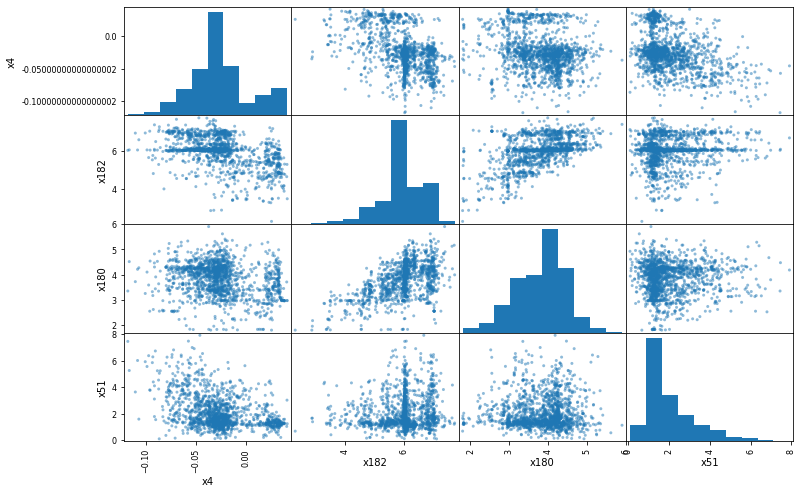

In [54]:
from pandas.plotting import scatter_matrix

attributes = ["x4", "x182", "x180",
              "x51"]
scatter_matrix(df_x[attributes], figsize=(12, 8));

# Select those special ligands, and Show them

In [55]:
# Select ligands with x4(LUMO Energy) in range which we hypothesis to provide yields
list_features = []
for i in df_x['x4']:
    if -0.03<i<-0.01:
        list_features.append(i)
    elif 0.03<i<0.04:
        list_features.append(i)
    else:
        continue
df_ligands_selected = pd.DataFrame({'x4':list_features})


In [56]:
df_dft_selected = df_x.loc[df_x['x4'].isin(df_ligands_selected['x4'])]

In [57]:
df_dft_selected

,SMILES,ID,buch,x1,x2,x3,x4,x5,x6,x7,...,x184,x185,x186,x187,x188,x189,x190,x191,x192,x193
269,Oc1ccc(P(c2ccccc2)c2ccccc2)cc1,275,NaN,-0.049778,1.840157,-0.223190,-0.028370,-0.125780,0.194820,0.040603,...,0.000000,6.045284,6.991718,6.991718,6.991718,0.000000,6.991718,1,4,68.943806
356,COc1cc(C(C)(C)C)cc(C(C)(C)C)c1-c1ccccc1P(C1CCC...,368,NaN,-0.060689,1.810071,-0.213519,-0.016677,-0.115098,0.196842,0.033654,...,1.666878,6.456207,7.311910,6.959667,8.329895,1.370228,8.255192,34,42,4701.434167
531,Cc1cccc(C)c1OP(Oc1c(C)cccc1C)Oc1c(C)cccc1C,549,NaN,-0.016545,1.900984,-0.247535,-0.016167,-0.131851,0.231368,0.037570,...,0.290577,6.864581,6.755854,6.668943,7.957177,1.288233,7.924333,5,16,971.469056
1316,CC(C)OCCP(c1ccccc1)c1ccccc1,1607,NaN,-0.052090,1.843863,-0.228015,-0.027974,-0.127994,0.200040,0.040955,...,1.224768,6.044818,7.162876,6.968586,7.361241,0.392655,7.063091,22,39,643.865528
436,CSP(SC)SC,452,NaN,-0.022541,1.981699,-0.238576,-0.025716,-0.132146,0.212860,0.041021,...,0.074994,5.044904,6.924897,5.485809,7.055466,1.569657,7.055466,5,9,13.236889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
626,CN1CCN(P(N2CCN(C)CC2)N2CCN(C)CC2)CC1,674,NaN,-0.055363,1.800290,-0.212641,0.030810,-0.090915,0.243451,0.016987,...,1.166189,5.908700,6.772195,6.751241,7.079469,0.328228,6.751241,26,39,1546.792389
1292,COc1cc(OC)c(P(c2ccccc2)c2ccccc2)c(OC)c1,1583,NaN,-0.064457,1.874300,-0.209929,-0.018232,-0.114080,0.191697,0.033950,...,0.024943,6.091860,7.135168,7.121617,7.151033,0.029416,7.132961,4,14,452.589833
1464,Cc1ccc(P(N2CCCCC2)N2CCCCC2)cc1,1757,NaN,-0.058153,1.812292,-0.217776,-0.016551,-0.117164,0.201225,0.034110,...,0.142059,6.036865,6.837014,6.818627,7.272065,0.453438,7.240243,12,19,441.891028
165,CC(C)(C)c1cc(P(CC2CCCC2)c2cc(C(C)(C)C)cc(C(C)(...,170,NaN,-0.056657,1.833048,-0.219441,-0.020721,-0.120081,0.198720,0.036289,...,0.249136,7.231463,7.204120,6.961234,8.044027,1.082792,7.420267,43,49,4554.078972


In [58]:
# Select ligands with x87(Vbur min) in range which Vbur min<32%
list_features = []
df_Vburmin = df_x['x87']/179.59
for i in df_Vburmin:
    if i<0.32:
        list_features.append(i)
    else:
        continue
df_selected = pd.DataFrame({'x87':list_features})

In [59]:
df_dft_Vburmin = df_x.loc[df_Vburmin.isin(df_selected['x87'])]

In [60]:
df_dft_Vburmin.shape

(1165, 199)

In [61]:
selected_or_screened = pd.read_excel('P_selected.xlsx', sheet_name='manual_vs_all_UMAP')

In [62]:
df_dft_Vburmin = df_dft_Vburmin.loc[~df_dft_Vburmin['ID'].isin(selected_or_screened['ID'])]

In [63]:
df_dft_Vburmin.to_excel('output.xlsx')

In [64]:
df_dft_selected2 = df_dft_selected.loc[df_Vburmin.isin(df_selected['x87'])]

In [65]:
df_dft_selected2['x87']/179.59

269     0.282730
356     0.317446
1316    0.258742
436     0.257979
386     0.229751
          ...   
131     0.229064
1460    0.230875
626     0.301734
1464    0.300272
165     0.255492
Name: x87, Length: 442, dtype: float64

In [66]:
df_dft_selected2.shape

(442, 199)

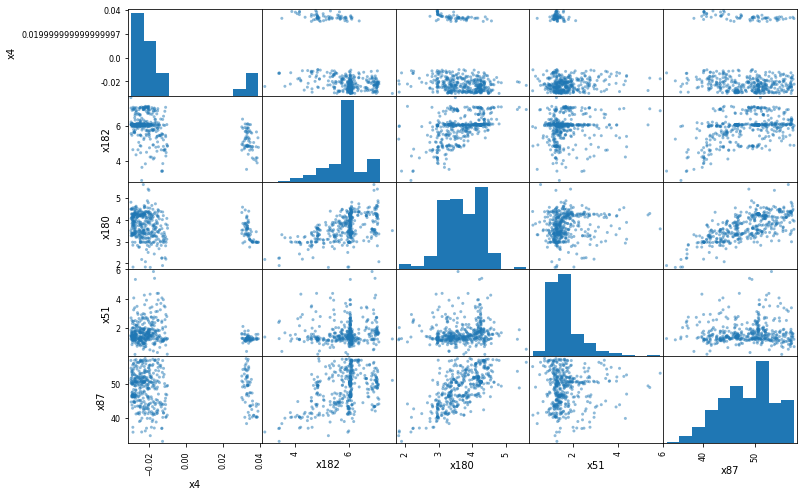

In [89]:
from pandas.plotting import scatter_matrix

attributes = ["x4", "x182", "x180",
              "x51",'x87']
scatter_matrix(df_dft_selected2[attributes], figsize=(12, 8));

Ligand remover using x51 dipomoment < 2.9 as threshold actually can get use 33 less ligands to select from                 
However, I do not plan to use this threshold here.

In [67]:
# Select ligands with x87(Vbur min) in range which Dipolemoment<2.9
list_features = []
for i in df_x['x51']:
    if i<2.9:
        list_features.append(i)
    else:
        continue
df_ligands_selected = pd.DataFrame({'x51':list_features})

In [68]:
#Select ligands from x4 threshold and Vburmin<32% with dipolemoment<2.9
#df_dft_selected_x51 = df_dft_selected2.loc[df_dft_selected2['x51'].isin(df_ligands_selected['x51'])]

#This following line allows only selection3 to be made 
#df_dft_selected_x51 = df_x.loc[df_x['x51'].isin(df_ligands_selected['x51'])]

Remove ligands that have been screened

In [69]:
df_dft_selected3 = df_dft_selected2.loc[~df_dft_selected2['ID'].isin(df_screened['ID'])]

In [70]:
df_dft_selected3.shape

(407, 199)

print out representative phosphine

['Cl', 'C', '1', '=', 'C', 'C', '=', 'C', '(', 'O', 'C', ')', 'C', '=', 'C', '1', '.', 'O', 'B', '(', 'O', ')', 'C', '1', '=', 'C', 'C', '=', 'C', 'C', '=', 'C', '1', '>>', 'C', 'O', 'C', '(', 'C', '=', 'C', '1', ')', '=', 'C', 'C', '=', 'C', '1', 'C', '2', '=', 'C', 'C', '=', 'C', 'C', '=', 'C', '2']


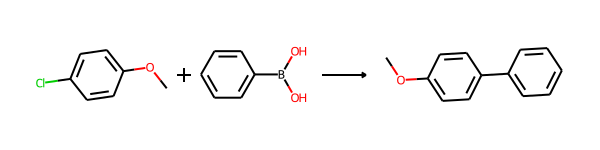

In [71]:
from rxnfp.tokenization import get_default_tokenizer, SmilesTokenizer
from rdkit.Chem import rdChemReactions
from rdkit.Chem import Draw

smiles_tokenizer = get_default_tokenizer()

reaction_smiles = 'ClC1=CC=C(OC)C=C1.OB(O)C1=CC=CC=C1>>COC(C=C1)=CC=C1C2=CC=CC=C2'
rxn = rdChemReactions.ReactionFromSmarts(reaction_smiles,useSmiles=True)

print(smiles_tokenizer.tokenize(reaction_smiles))
rxn


[00:12:38] Explicit valence for atom # 7 B, 6, is greater than permitted
c:\Users\Ran Tao\.conda\envs\edbo\lib\site-packages\rdkit\Chem\Draw\IPythonConsole.py:254: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  % (maxMols))


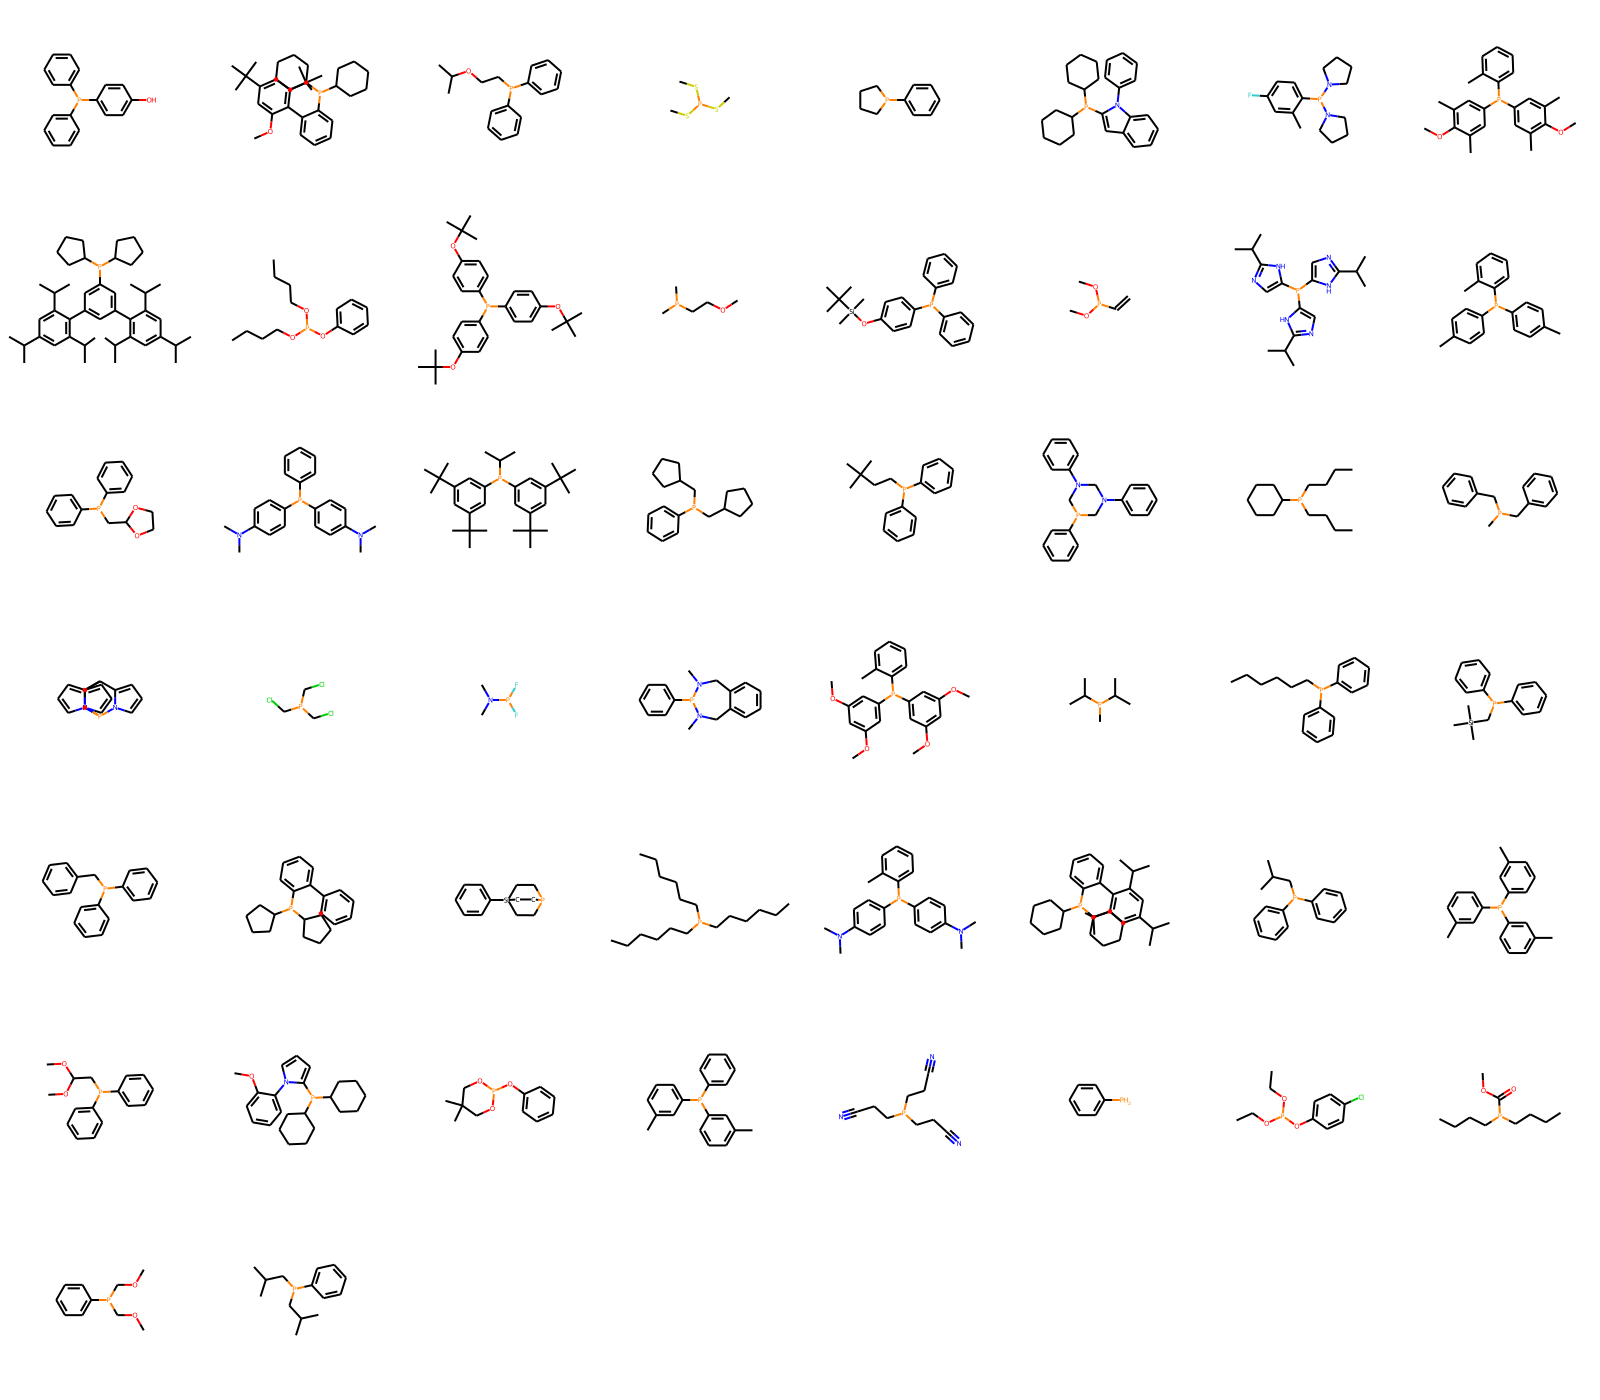

In [72]:
mols = [Chem.MolFromSmiles(smi) for smi in df_dft_selected2['SMILES']]
Draw.MolsToGridImage(mols, molsPerRow=8, subImgSize=(200, 200))

In [73]:
df_commercial = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 25, 30, 31, 32, 37, 38, 39, 42, 43, 44, 45, 46, 47, 48, 50, 53, 54, 57, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 75, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 102, 103, 104, 108, 109, 110, 114, 115, 116, 117, 118, 119, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 157, 160, 161, 162, 190, 191, 193, 194, 195, 196, 197, 198, 199, 202, 203, 205, 206, 207, 208, 210, 211, 212, 213, 214, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 298, 299, 300, 301, 302, 303, 304, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 363, 364, 365, 368, 369, 370, 371, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 384, 385, 386, 387, 388, 389, 391, 392, 393, 394, 395, 396, 397, 398, 399, 406, 412, 413, 414, 415, 416, 418, 419, 420, 423, 431, 433, 434, 436, 438, 439, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 471, 472, 473, 474, 475, 476, 477, 478, 479, 480, 481, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 500, 501, 503, 505, 506, 509, 512, 522, 523, 525, 526, 527, 528, 529, 530, 531, 532, 534, 535, 536, 537, 538, 539, 540, 542, 543, 545, 546, 547, 548, 549, 550, 551, 553, 554, 555, 556, 557, 558, 559, 560, 561, 562, 563, 564, 566, 568, 569, 570, 573, 574, 575, 576, 577, 578, 580, 581, 582, 583, 584, 586, 587, 588, 589, 590, 591, 593, 595, 597, 598, 600, 601, 602, 604, 606, 607, 608, 609, 610, 611, 613, 614, 615, 622, 623, 625, 630, 638, 639, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649, 650, 651, 652, 653, 654, 655, 656, 657, 658, 659, 660, 661, 662, 663, 664, 666, 667, 668, 669, 670, 671, 672, 673, 674, 675, 676, 677, 678, 679, 680, 681, 682, 683, 684, 685, 686, 687, 693, 694, 701, 703, 704, 709, 710, 711, 713, 715, 716, 717, 718, 719, 720, 721, 722, 723, 724, 725, 726, 727, 728, 729, 730, 731, 732, 733, 734, 735, 736, 737, 738, 739, 745, 749, 750, 753, 754, 755, 757, 762, 763, 765, 766, 767, 768, 769, 772, 773, 775, 777, 785, 795, 796, 797, 798, 799, 802, 806, 817, 830, 832, 833, 834, 836, 837, 838, 852, 870, 871, 873, 874, 877, 880, 881, 883, 884, 885, 886, 887, 888, 889, 891, 892, 893, 897, 902, 903, 904, 905, 906, 911, 913, 914, 915, 919, 923, 924, 925, 926, 931, 938, 939, 945, 950, 953, 955, 959, 960, 964, 965, 966, 970, 971, 976, 978, 990, 991, 993, 995, 1003, 1004, 1005, 1007, 1011, 1012, 1028, 1029, 1031, 1032, 1036, 1044, 1045, 1048, 1057, 1058, 1060, 1080, 1081, 1086, 1090, 1098, 1117, 1120, 1122, 1123, 1124, 1125, 1126, 1127, 1136, 1146, 1183, 1224, 1276, 1277, 1282, 1283, 1284, 1286, 1287, 1288, 1289, 1290, 1292, 1293, 1294, 1295, 1297, 1298, 1299, 1402, 1403, 1404, 1405, 1406, 1407, 1408, 1409, 1410, 1411, 1412, 1413, 1414, 1415, 1417, 1418, 1419, 1420, 1421, 1422, 1423, 1424, 1425, 1426, 1427, 1428, 1430, 1432, 1433, 1436, 1438, 1451, 1459, 1471, 1472, 1478, 1480, 1483, 1484, 1485, 1486, 1487, 1492, 1493, 1494, 1495, 1496, 1497, 1504, 1511]

In [74]:
df_dft_selected3_commercial = df_dft_selected3.loc[df_dft_selected3['ID'].isin(df_commercial)]

In [75]:
df_dft_selected3_excluede = df_dft_selected3.loc[~df_dft_selected3['ID'].isin(df_commercial)]

In [93]:
df_dft_selected2_commercial = df_dft_selected2.loc[df_dft_selected2['ID'].isin(df_commercial)]


In [76]:
df_dft_selected3_excluede

,SMILES,ID,buch,x1,x2,x3,x4,x5,x6,x7,...,x184,x185,x186,x187,x188,x189,x190,x191,x192,x193
1316,CC(C)OCCP(c1ccccc1)c1ccccc1,1607,NaN,-0.052090,1.843863,-0.228015,-0.027974,-0.127994,0.200040,0.040955,...,1.224768,6.044818,7.162876,6.968586,7.361241,0.392655,7.063091,22,39,643.865528
1107,Cc1cc(F)ccc1P(N1CCCC1)N1CCCC1,1266,NaN,-0.052963,1.805755,-0.211344,-0.015587,-0.113466,0.195757,0.032887,...,0.250789,5.961489,6.948905,6.841190,7.626467,0.785277,6.884325,13,21,394.229583
1221,COc1c(C)cc(P(c2cc(C)c(OC)c(C)c2)c2ccccc2C)cc1C,1506,NaN,-0.052125,1.840773,-0.218796,-0.021835,-0.120316,0.196961,0.036749,...,0.015880,7.007716,7.021562,7.013637,7.577609,0.563972,7.577609,5,12,642.742528
1409,COCCP(C)C,1702,NaN,-0.061415,1.808750,-0.233218,0.037893,-0.097663,0.271111,0.017602,...,2.404492,4.012451,6.057924,5.776133,7.782646,2.006513,7.363086,12,17,29.385306
1301,CC(C)(C)[Si](C)(C)Oc1ccc(P(c2ccccc2)c2ccccc2)cc1,1592,NaN,-0.051042,1.842912,-0.221987,-0.026956,-0.124472,0.195031,0.039721,...,0.357742,6.042019,6.986072,6.966571,7.014339,0.047768,7.012408,10,20,930.898861
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,COc1ccc(P(c2ccc(OC)cc2)c2ccccc2OC)cc1,1747,NaN,-0.059532,1.841003,-0.211127,-0.018892,-0.115010,0.192234,0.034410,...,0.038022,6.048726,7.032004,7.009576,7.196572,0.186996,7.196572,9,21,631.715444
1436,CCOC(OCC)P(C(C)C)C(C)C,1729,NaN,-0.057062,1.812071,-0.229423,0.033281,-0.098071,0.262704,0.018308,...,1.098823,6.594313,7.004058,5.987921,7.557421,1.569499,7.109254,43,46,501.325861
867,C1CCC(P(C2CCCCC2)N2CCOCC2)CC1,999,NaN,-0.058697,1.799864,-0.222687,0.030234,-0.096227,0.252921,0.018306,...,0.550482,6.101832,7.135465,6.678681,7.297889,0.619208,7.097082,25,29,690.362750
1460,C=CP(CC)CC,1753,NaN,-0.056648,1.824307,-0.236669,-0.012187,-0.124428,0.224481,0.034492,...,0.283702,4.593859,5.989567,5.774495,6.807862,1.033367,6.747395,15,21,35.686028


In [77]:
df_dft_selected3_commercial['Mols']=None

c:\Users\Ran Tao\.conda\envs\edbo\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [78]:
#reframe smiles strings from kraken smiles
index = df_dft_selected3_commercial.index
print('Parsing smiles strings')
for i in index:
    mol = Chem.MolFromSmiles(df_dft_selected3_commercial['SMILES'][i])
    if mol is None:
        # handing error
        print("cannot parse SMILES: {}".format(i))
        continue
    df_dft_selected3_commercial['Mols'][i]=mol
    smi = Chem.MolToSmiles(mol)
    if smi is None:
        # handing error
        print("cannot parse SMILES: {}".format(mol))
        continue
    df_dft_selected3_commercial['SMILES'][i] = smi

c:\Users\Ran Tao\.conda\envs\edbo\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
c:\Users\Ran Tao\.conda\envs\edbo\lib\site-packages\ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Parsing smiles strings
cannot parse SMILES: 941


[00:12:39] Explicit valence for atom # 7 B, 6, is greater than permitted


In [79]:
mols = []
for smi in df_dft_selected3_commercial['SMILES']:
    mol = Chem.MolFromSmiles(smi)
    if mol is None:
        # handing error
        print("cannot parse SMILES: {}".format(smi))
        continue

    mols.append(mol)
subms=[]
bad_structures = ['OP(O)O','CP(OC)OC','COP(C1=CC=CC=C1)OC','OP(N)O','S','F','Cl','I','Br','C=C','C=O','C#N','PO']
for i in bad_structures:
    p = Chem.MolFromSmiles(i)
    submolstruc = [x for x in mols if x.HasSubstructMatch(p)]
    subms.extend(submolstruc)
    
subms_smiles = []
for smi in subms:
    mol = Chem.MolToSmiles(smi)
    if mol is None:
        # handing error
        print("cannot parse SMILES: {}".format(smi))
        continue

    subms_smiles.append(mol)
len(subms_smiles)


cannot parse SMILES: c1ccc(cc1)P([B]1234[BH]567[BH]891[BH]1%102[BH]2%114[BH]435[CH]357[BH]768[CH]691[BH]1%102[BH]%1143[BH]5761)c1ccccc1


[00:12:39] Explicit valence for atom # 7 B, 6, is greater than permitted


119

In [80]:
df_dft_selected3_commercial_noPO = df_dft_selected3_commercial.loc[~df_dft_selected3_commercial['SMILES'].isin(subms_smiles)]

In [81]:
df_rules_select = pd.read_excel('P_selected.xlsx', sheet_name='Commercial_rules_')

In [82]:
df_rules_seen = pd.read_excel('P_selected.xlsx', sheet_name='Commercial_Alkyl_')

In [83]:
df_nonseen = df_rules_select.loc[~df_rules_select['SMILES'].isin(df_rules_seen['SMILES'])]

c:\Users\Ran Tao\.conda\envs\edbo\lib\site-packages\rdkit\Chem\Draw\IPythonConsole.py:254: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  % (maxMols))


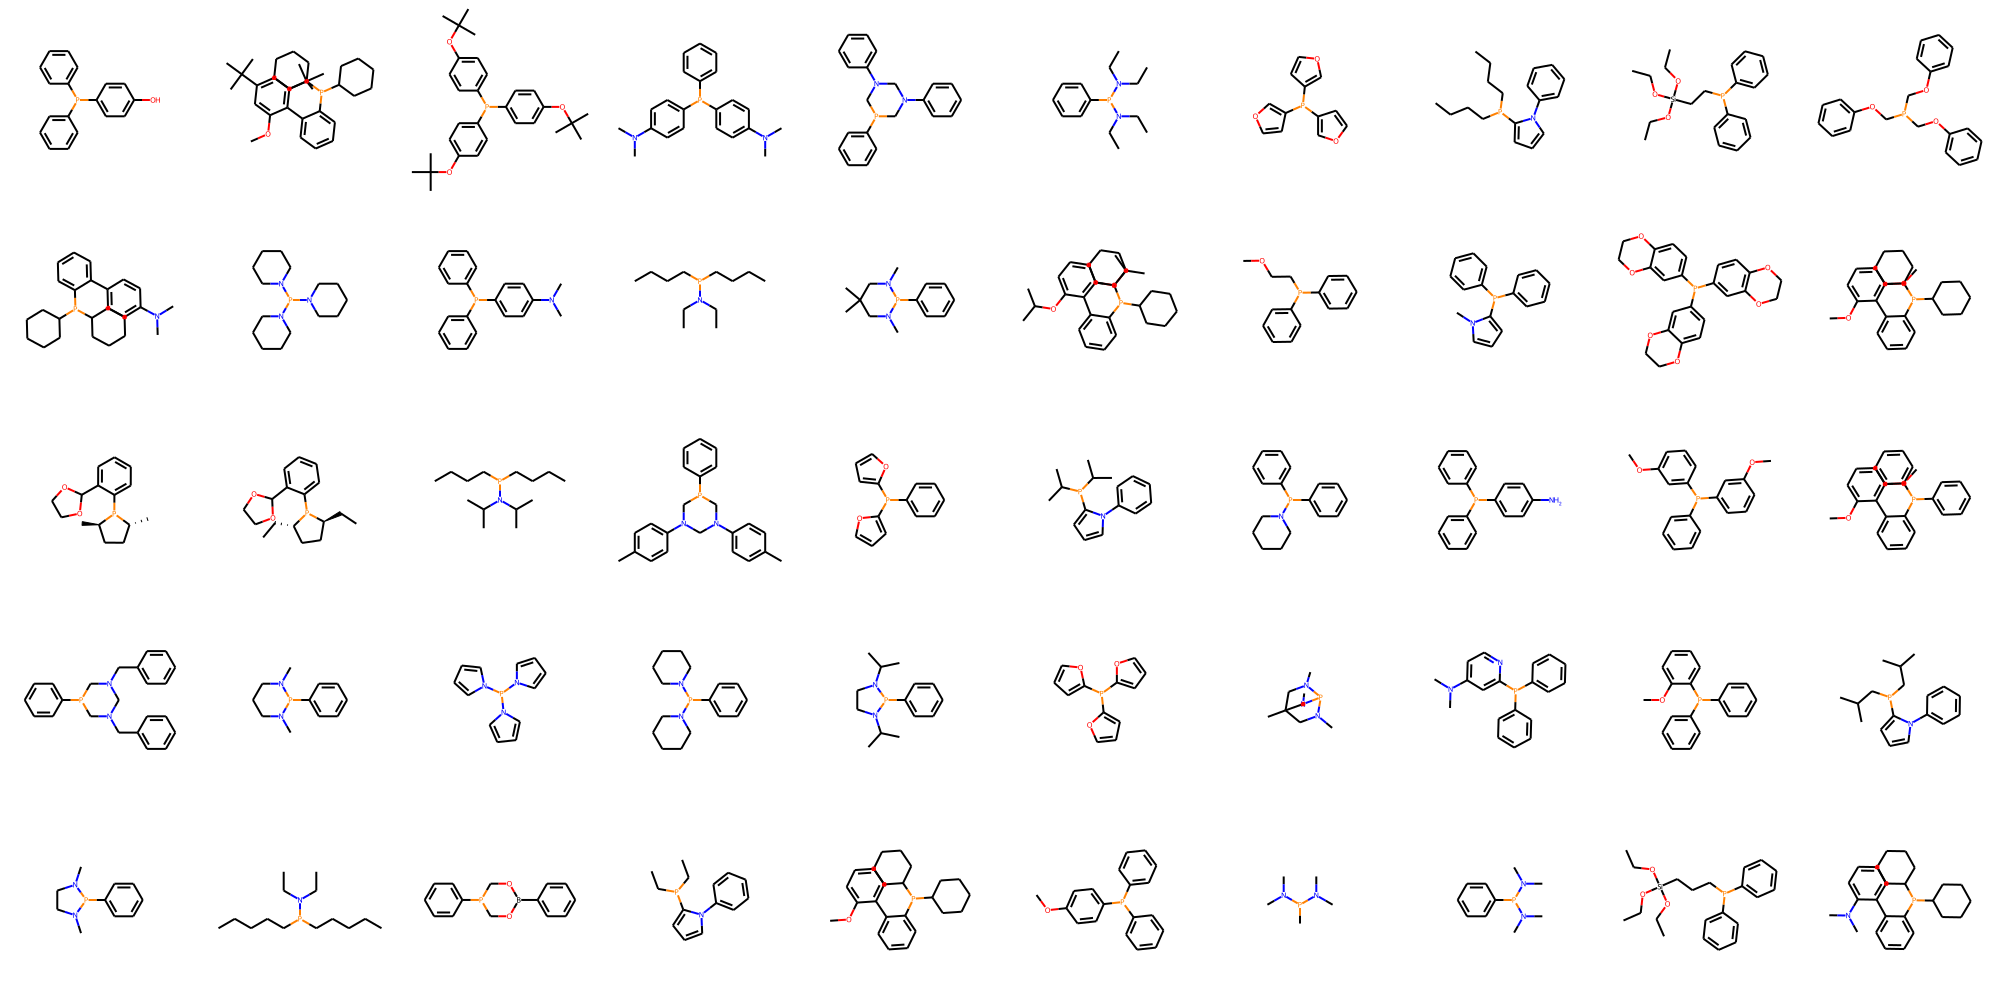

In [84]:
mols = [Chem.MolFromSmiles(smi) for smi in df_nonseen['SMILES']]
Draw.MolsToGridImage(mols, molsPerRow=10, subImgSize=(200, 200))

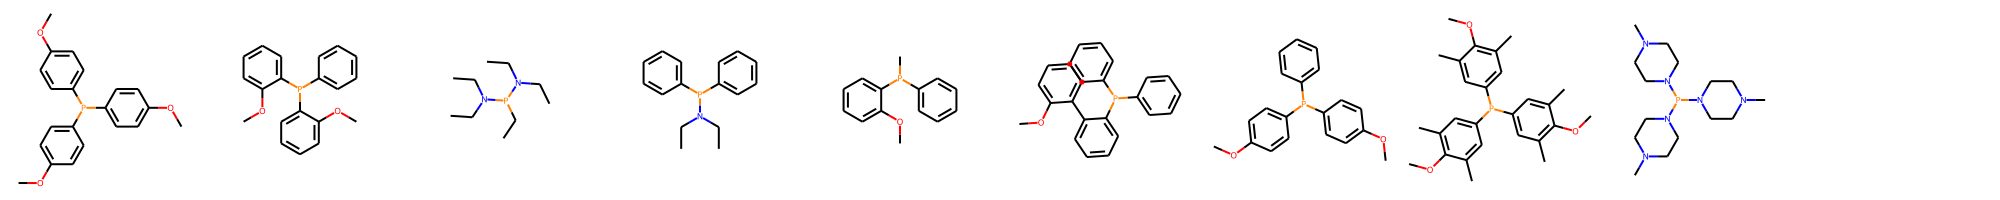

In [85]:
mols = [Chem.MolFromSmiles(smi) for smi in df_nonseen['SMILES'][50:]]
Draw.MolsToGridImage(mols, molsPerRow=10, subImgSize=(200, 200))

In [86]:
df_dft_selected3_commercial_noPO['SMILES'][10:]

18                        c1ccc(CP(c2ccccc2)c2ccccc2)cc1
923                          c1ccc([Si]23CCP(CC2)CC3)cc1
453                                CCCCCCP(CCCCCC)CCCCCC
0      CC(C)c1cc(C(C)C)c(-c2ccccc2P(C2CCCCC2)C2CCCCC2...
237                    Cc1cccc(P(c2ccccc2)c2cccc(C)c2)c1
                             ...                        
80                                  CP(c1ccccc1)c1ccccc1
226                  COc1ccc(P(c2ccccc2)c2ccc(OC)cc2)cc1
979        Cc1cc(C)c(-c2ccccc2P(C2CCCCC2)C2CCCCC2)c(C)c1
241    COc1c(C)cc(P(c2cc(C)c(OC)c(C)c2)c2cc(C)c(OC)c(...
626                 CN1CCN(P(N2CCN(C)CC2)N2CCN(C)CC2)CC1
Name: SMILES, Length: 120, dtype: object

In [87]:
mols = [Chem.MolFromSmiles(smi) for smi in sam_selected_df['SMILES']]
Draw.MolsToGridImage(mols, molsPerRow=10, subImgSize=(200, 200))

NameError: name 'sam_selected_df' is not defined

In [ ]:
df_dft_selected3_commercial_noPO.to_excel('output.xlsx')

In [ ]:
sam_selected = ['CCCCP(Cc1ccccc1)CCCC','c1(CCP(C2CCCCC2)C3CCCCC3)ccccc1','CP(Cc1ccccc1)C','C[Si](C)(P([Si](C)(C)C)c1ccccc1)C'
                ,'C[Si](c1ccccc1)(P(C2CCCCC2)C3CCCCC3)C','CC(C)(c1ccc(P(c2ccc(C(C)(C)C)cc2)c3ccc(C(C)C)cc3)cc1)C',
                'C[Si](C)(C)CP(C1=CC=CC=C1)C2=CC=CC=C2','C1(P(CC2=CC=CC=C2)C3=CC=CC=C3)=CC=CC=C1',
                'CC(C(C)=C1)=CC=C1P(C2=CC=C(C)C(C)=C2)C3=CC=C(C)C(C)=C3','C[Si](C)(C)P(C1=CC=CC=C1)C2=CC=CC=C2',
                'CC1=CC(P(C2=CC(C)=CC(C)=C2)C3=CC(C)=CC(C)=C3)=CC(C)=C1','P1(CCCCCC1)C2=CC=CC=C2','C1(P(C2=CC=CC=C2)CC3=CC=CC=C3)=CC=CC=C1',
                'P1(CCCCC1)C2=CC=CC=C2','C[C@H]1CC[C@H](C)P1C2=CC=CC=C2','CC(C)(C)P(C1=CC=CC=C1)C2=CC=CC=C2',
                'CC1=CC=CC=C1P(C2CCCCC2)C3CCCCC3','CC1=C(C)P(C2=CC=CC=C2)C(C)=C1C','C1(P2CC3=C(C4=CC=C3)C5(CC4)C6=C(CC5)C=CC=C6C2)=CC=CC=C1',
                'C1(P(CC2=CC=CC=C2)CC3=CC=CC=C3)=CC=CC=C1','CP(C)C1CCCCC1','c1ccc([Si]23CCP(CC2)CC3)cc1']

In [ ]:
mols = []
for smi in sam_selected:
    mol = Chem.MolToSmiles(Chem.MolFromSmiles(smi))
    if mol is None:
        # handing error
        print("cannot parse SMILES: {}".format(smi))
        continue

    mols.append(mol)

In [ ]:
len(mols)

22

In [ ]:
sam_selected_df = df_dft_selected3_commercial.loc[df_dft_selected3_commercial['SMILES'].isin(mols)]

In [ ]:
sam_selected_df.to_excel('output.xlsx')

# Screen using MLR

In [ ]:
df_origin = pd.read_excel('smc_data_catagorized.xlsx', sheet_name='Vbur_min32_x197')
df_origin = df_origin.sample(frac=1,random_state=42)
df_x = df_origin.drop(columns = ['SMILES','ID','ID.1','Unnamed: 0','y1','y2','y3','y4'])
df_x = df_x.drop(columns = ['y5','y6','y7','y8','y9','y10','y11','y12'])
df_x = df_x.drop(columns = ['y13','y14','y15','y16','y17','y18','y19','buch'])
df_x = df_x.drop(columns = ['x198','x199','x200','x201','x202','Unnamed: 110'])
df_y = df_origin[['x198']]

In [ ]:
print('Shape of input:',df_x.shape,'\nShape of output:' ,df_y.shape)
df_x = df_x.astype(float)
df_y = df_y.astype(float)

Shape of input: (61, 198) 
Shape of output: (61, 1)


In [ ]:
from sklearn import linear_model
def linear_reg_of_3_features(df_x,df_y,i,j,k):
    df_3f = df_x[[i,j,k]]
    reg=linear_model.LinearRegression()     #initiating linearregression
    model = reg.fit(df_3f,df_y)
    Intercept=reg.intercept_
    Coefficients=reg.coef_
    return Intercept, Coefficients, model

In [ ]:
df_x = df_x.sample(frac=1,random_state=42)
df_y = df_y.sample(frac=1,random_state=42)

In [ ]:
df_y

,x198
0,67.0
55,5.0
39,49.0
36,0.0
3,37.0
...,...
1,38.0
53,0.0
27,9.0
22,31.0


In [ ]:
reg=linear_model.LinearRegression()  
df_x
model = reg.fit(df_x[['x4','x51','x182']],df_y)
Intercept=reg.intercept_
Coefficients=reg.coef_
#Intercept, Coefficients, model = linear_reg_of_3_features(df_x,df_y,'x4','x197')

In [ ]:
df_all =df_all.fillna(0)
all_ligand_prediction =  model.predict(df_all[['x4','x51','x182']])


In [ ]:
productive_rxn = []
for i in all_ligand_prediction:
    if i>30:
        productive_rxn.append(i)

In [ ]:
#np.savetxt('save_predict_yield_x28_x17_x77_30.txt', productive_rxn, delimiter=',')   # X is an array

In [ ]:
len(productive_rxn)

694

In [ ]:
df_all['pred_451182'] = all_ligand_prediction

In [ ]:
def mlr_predict_stream(df_x,df_y,df_all,i,j,k):
    Intercept, Coefficients, model = linear_reg_of_3_features(df_x,df_y,i,j,k)
    all_ligand_prediction =  model.predict(df_all[[i,j,k]])
    #np.savetxt('save_predict_yield_'+i+j+k+'.txt', productive_rxn, delimiter=',')   # X is an array
    len(productive_rxn)
    return all_ligand_prediction,productive_rxn

In [ ]:
all_ligand_prediction,productive_rxn = mlr_predict_stream(df_x,df_y,df_all,'x4','x51','x182')

In [ ]:
# Change column name!!!!!!
df_all['pred_451182'] = all_ligand_prediction

In [ ]:
#df_all.to_excel('1007_prediction.xlsx')

In [ ]:
df_all

,SMILES,ID,x1,x2,x3,x4,x5,x6,x7,x8,...,x185,x186,x187,x188,x189,x190,x191,x192,x193,pred_451182
269,Oc1ccc(P(c2ccccc2)c2ccccc2)cc1,275,-0.049778,1.840157,-0.223190,-0.028370,-0.125780,0.194820,0.040603,0.060200,...,6.045284,6.991718,6.991718,6.991718,0.000000,6.991718,1,4,68.943806,33.724442
356,COc1cc(C(C)(C)C)cc(C(C)(C)C)c1-c1ccccc1P(C1CCC...,368,-0.060689,1.810071,-0.213519,-0.016677,-0.115098,0.196842,0.033654,0.065350,...,6.456207,7.311910,6.959667,8.329895,1.370228,8.255192,34,42,4701.434167,38.149454
1043,c1ccc2cc3c(cc2c1)Cc1cc2ccccc2cc1P3C1CCCCC1,1198,-0.051859,1.839126,-0.226923,-0.054546,-0.140735,0.172377,0.057452,0.025258,...,6.972813,7.370473,6.734631,7.377948,0.643317,7.333647,10,11,474.509333,25.703716
531,Cc1cccc(C)c1OP(Oc1c(C)cccc1C)Oc1c(C)cccc1C,549,-0.016545,1.900984,-0.247535,-0.016167,-0.131851,0.231368,0.037570,0.062806,...,6.864581,6.755854,6.668943,7.957177,1.288233,7.924333,5,16,971.469056,50.759377
1316,CC(C)OCCP(c1ccccc1)c1ccccc1,1607,-0.052090,1.843863,-0.228015,-0.027974,-0.127994,0.200040,0.040955,0.068221,...,6.044818,7.162876,6.968586,7.361241,0.392655,7.063091,22,39,643.865528,30.085462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016,C[Si](C)(C)CCOC(=O)c1ccc(P(Oc2ccc(Cl)cc2)c2ccc...,1166,-0.026575,1.918851,-0.241939,-0.076593,-0.159266,0.165347,0.076725,0.004119,...,5.999547,7.239080,7.111495,7.626795,0.515301,7.439283,49,54,3522.666361,0.183520
165,CC(C)(C)c1cc(P(CC2CCCC2)c2cc(C(C)(C)C)cc(C(C)(...,170,-0.056657,1.833048,-0.219441,-0.020721,-0.120081,0.198720,0.036289,0.058144,...,7.231463,7.204120,6.961234,8.044027,1.082792,7.420267,43,49,4554.078972,50.697145
7,CC(C)(C)P(C(C)(C)C)C(C)(C)C,8,-0.067185,1.780165,-0.216880,0.036010,-0.090435,0.252890,0.016170,0.113990,...,4.894739,6.648917,6.648917,6.648917,0.000000,6.648917,1,2,20.093722,27.753542
219,c1ccc(P(c2ccccn2)c2ccccn2)cc1,224,-0.048125,1.883926,-0.233374,-0.045605,-0.139490,0.187770,0.051850,0.047959,...,6.050017,7.187074,7.152275,7.207172,0.054897,7.174442,4,12,169.850806,13.608194


Correlation between predictions

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df_all['pred_451182'],df_all['pred_281777'])
plt.show()

KeyError: 'pred_281777'

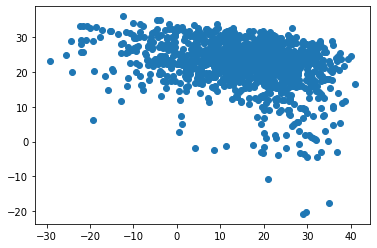

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df_all['pred_451182'],df_all['pred_487'])
plt.show()

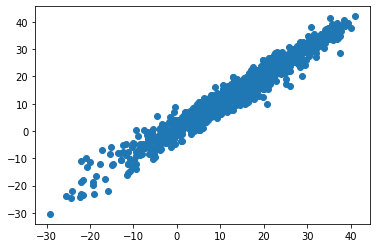

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df_all['pred_451182'],df_all['pred_851182'])
plt.show()

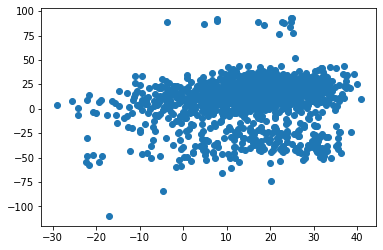

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df_all['pred_451182'],df_all['pred_2850182'])
plt.show()

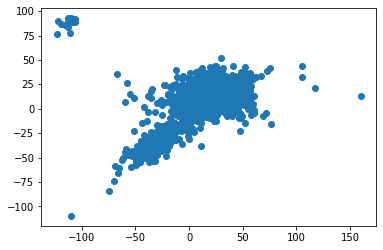

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df_all['pred_281777'],df_all['pred_2850182'])
plt.show()

Building the P ligand set based on assumption 451182

In [ ]:
productive_rxn = []
for i in df_all['pred_451182']:
    if i>30:
        productive_rxn.append(i)
df_451182= pd.DataFrame (productive_rxn, columns = ['pred_451182'])
df_451182 = df_all.loc[df_all['pred_451182'].isin(df_451182['pred_451182'])]

In [ ]:
df_451182

,SMILES,ID,x1,x2,x3,x4,x5,x6,x7,x8,...,x186,x187,x188,x189,x190,x191,x192,x193,pred_281777,pred_451182
531,Cc1cccc(C)c1OP(Oc1c(C)cccc1C)Oc1c(C)cccc1C,549,-0.016545,1.900984,-0.247535,-0.016167,-0.131851,0.231368,0.037570,0.062806,...,6.755854,6.668943,7.957177,1.288233,7.924333,5,16,971.469056,14.484437,31.982940
1044,Cc1cc(C)c(-c2cccc3cc4c(cc23)P2C(C)(C)CC4CC2(C)...,1199,-0.054369,1.842039,-0.225320,-0.046850,-0.136085,0.178470,0.051883,0.040960,...,7.635020,7.635020,7.635020,0.000000,7.635020,1,1,55.545583,21.837334,38.457155
154,CC(C)c1cc(C(C)C)c(-c2cc(-c3c(C(C)C)cc(C(C)C)cc...,159,-0.057313,1.820799,-0.233646,-0.029305,-0.131475,0.204341,0.042297,0.043611,...,7.335296,6.775336,7.363890,0.588554,7.280769,36,37,8025.018778,24.375399,30.959080
929,Cc1cc(C)c(-n2c(C)c(C)n(-c3c(C)cc(C)cc3C)c2=NP(...,1067,-0.081735,1.736091,-0.158409,-0.011022,-0.084716,0.147387,0.024347,0.053888,...,6.940850,6.791555,7.198004,0.406449,6.934788,7,14,4783.569389,-17.786321,35.050401
176,CC(C)P(c1cc(C(C)(C)C)cc(C(C)(C)C)c1)c1cc(C(C)(...,181,-0.057319,1.821210,-0.223610,-0.021714,-0.122662,0.201896,0.037267,0.057647,...,7.162101,7.087882,7.243943,0.156061,7.120569,23,29,2194.114750,24.679672,31.870723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
567,C1CCC(OP(OC2CCCCC2)OC2CCCCC2)CC1,589,-0.041807,1.860638,-0.251071,0.023575,-0.113748,0.274645,0.023561,0.100502,...,7.239278,5.052395,7.618733,2.566338,7.618733,35,40,1270.289000,28.476611,32.998181
1046,Cc1cc(C)c(-c2cccc3c2CP(C(C)C)Cc2c-3cccc2-c2c(C...,1202,-0.054198,1.822697,-0.225160,-0.032870,-0.129015,0.192290,0.043281,0.046340,...,7.753696,7.666975,7.753720,0.086745,7.666975,2,4,365.786083,10.988845,37.969784
1353,CCCCP(CCCC)CC[Sn](C)(C)C,1646,-0.054089,1.784373,-0.229053,0.022892,-0.103081,0.251945,0.021100,0.099453,...,6.123587,5.747714,8.828374,3.080660,6.763684,51,53,593.554389,29.009138,32.853761
1115,CC(C)c1cccc(C(C)C)c1P(C12CC3CC(CC(C3)C1)C2)C12...,1274,-0.059143,1.734218,-0.203110,-0.019180,-0.111145,0.183930,0.033581,0.068340,...,7.590058,7.565393,7.590064,0.024671,7.590064,2,4,370.600583,0.833091,31.845572


In [ ]:
df_common = df_dft_selected3_commercial.loc[df_dft_selected3_commercial['ID'].isin(df_451182['ID'])]

In [ ]:
df_common

,SMILES,ID,x1,x2,x3,x4,x5,x6,x7,x8,...,x184,x185,x186,x187,x188,x189,x190,x191,x192,x193
591,CCOP1OCCN1c1ccccc1,639,-0.033726,1.920039,-0.218510,-0.011144,-0.114827,0.207366,0.031801,0.095517,...,0.073082,7.095817,6.770880,6.657177,6.983367,0.326190,6.932124,10,28,204.826639
482,CN(C)P1Oc2cccc3c2C2(CC3)CCc3cccc(c32)O1,498,-0.036410,1.921929,-0.238090,-0.011560,-0.124825,0.226530,0.034391,0.077320,...,0.000000,6.810818,7.381095,7.381095,7.381095,0.000000,7.381095,1,2,73.730361
382,Cc1ccccc1OP(Oc1ccccc1C)Oc1ccccc1C,394,-0.022560,1.981240,-0.245379,-0.020563,-0.132971,0.224816,0.039336,0.063659,...,0.282451,7.053048,7.606353,6.079884,7.883121,1.803237,7.565791,20,38,1366.904667
767,CC(C)(C)COP(OCC(C)(C)C)OCC(C)(C)C,873,-0.034155,1.880071,-0.255507,0.021168,-0.117170,0.276676,0.024812,0.102881,...,0.206983,6.836162,6.897344,6.436234,8.152533,1.716299,7.432581,18,39,916.384111
65,CCP(C1CCCCC1)C1CCCCC1,66,-0.064582,1.797880,-0.224109,0.034146,-0.094981,0.258255,0.017468,0.110929,...,0.376577,6.372047,7.253259,5.803132,7.518269,1.715137,7.161362,29,30,402.353806
611,CC(C)(C)[Si](C)(C)OP(O[Si](C)(C)C(C)(C)C)O[Si]...,659,-0.041353,1.828906,-0.245769,0.022246,-0.111761,0.268016,0.023304,0.088814,...,0.981386,6.323424,7.915342,6.633587,8.424553,1.790965,7.615762,34,41,1911.196861
525,CC(C)(C)c1ccccc1OP(Oc1ccccc1C(C)(C)C)Oc1ccccc1...,542,-0.017377,1.999692,-0.242459,-0.023243,-0.132851,0.219215,0.040263,0.054398,...,0.537621,7.447081,7.458009,6.933859,7.990318,1.056459,7.387434,15,28,2234.106111
186,CC(C)(C)c1ccc(OP(Oc2ccc(C(C)(C)C)cc2C(C)(C)C)O...,191,-0.020929,1.985677,-0.233839,-0.020213,-0.127026,0.213626,0.037782,0.051232,...,1.062687,7.013743,7.442859,6.799453,8.350309,1.550856,7.634683,36,40,6659.602528
74,c1ccc(OP(Oc2ccccc2)Oc2ccccc2)cc1,75,-0.022015,2.001821,-0.248174,-0.025615,-0.136895,0.222559,0.042110,0.060124,...,0.119794,7.026574,7.043202,5.068056,7.518817,2.450761,7.381239,11,25,466.932222
588,CP(C1CCCCC1)C1CCCCC1,623,-0.064434,1.799227,-0.225558,0.034935,-0.095312,0.260492,0.017437,0.111650,...,0.425483,6.054464,7.206300,5.804570,7.410007,1.605438,7.142175,20,22,232.277444


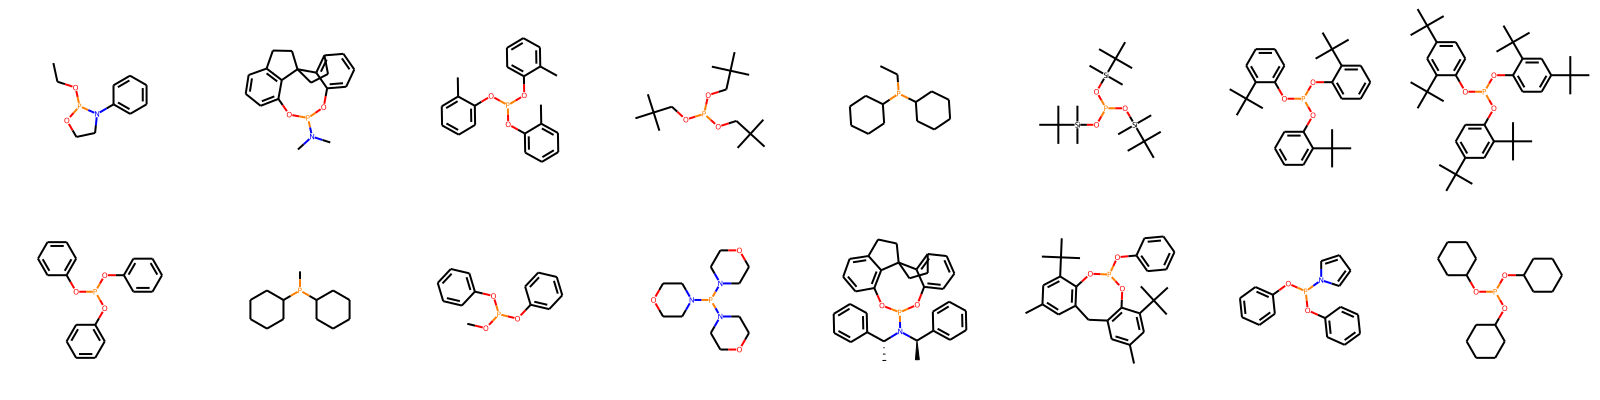

In [ ]:
# Those ligands that both satisfies the two thresholds 
# and are predicted high yields by the unreliable model of MLR on x4, x51, x182 features on just 61 datapoints
mols = [Chem.MolFromSmiles(smi) for smi in df_common['SMILES']]
Draw.MolsToGridImage(mols, molsPerRow=8, subImgSize=(200, 200))

This is weird. Why so many selected ligands have O-P(O)-O structures? 

Should we test them or abandon them? 

In [ ]:
df_common = df_dft_selected3.loc[df_dft_selected3['ID'].isin(df_451182['ID'])]

In [ ]:
#df_common.to_excel('P_selected.xlsx')

In [ ]:
productive_rxn = []
for i in df_all['pred_281777']:
    if i>30:
        productive_rxn.append(i)
df_281777= pd.DataFrame (productive_rxn, columns = ['pred_281777'])
df_281777 = df_all.loc[df_all['pred_281777'].isin(df_281777['pred_281777'])]

In [ ]:
df_common = df_281777.loc[df_281777['ID'].isin(df_451182['ID'])]

In [ ]:
df_common

,SMILES,ID,x1,x2,x3,x4,x5,x6,x7,x8,...,x189,x190,x191,x192,x193,pred_451182,pred_851182,pred_281777,pred_2850182,pred_487


In [ ]:
df_common.to_excel('output.xlsx')

In [ ]:
# Manually cut out some ligands that are O-P-O(O) or similar
df_manual_cutout = pd.read_excel('P_selected.xlsx', sheet_name='Manual_delete_')

[16:49:40] Explicit valence for atom # 7 B, 6, is greater than permitted
c:\Users\Ran Tao\.conda\envs\edbo\lib\site-packages\rdkit\Chem\Draw\IPythonConsole.py:254: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  % (maxMols))


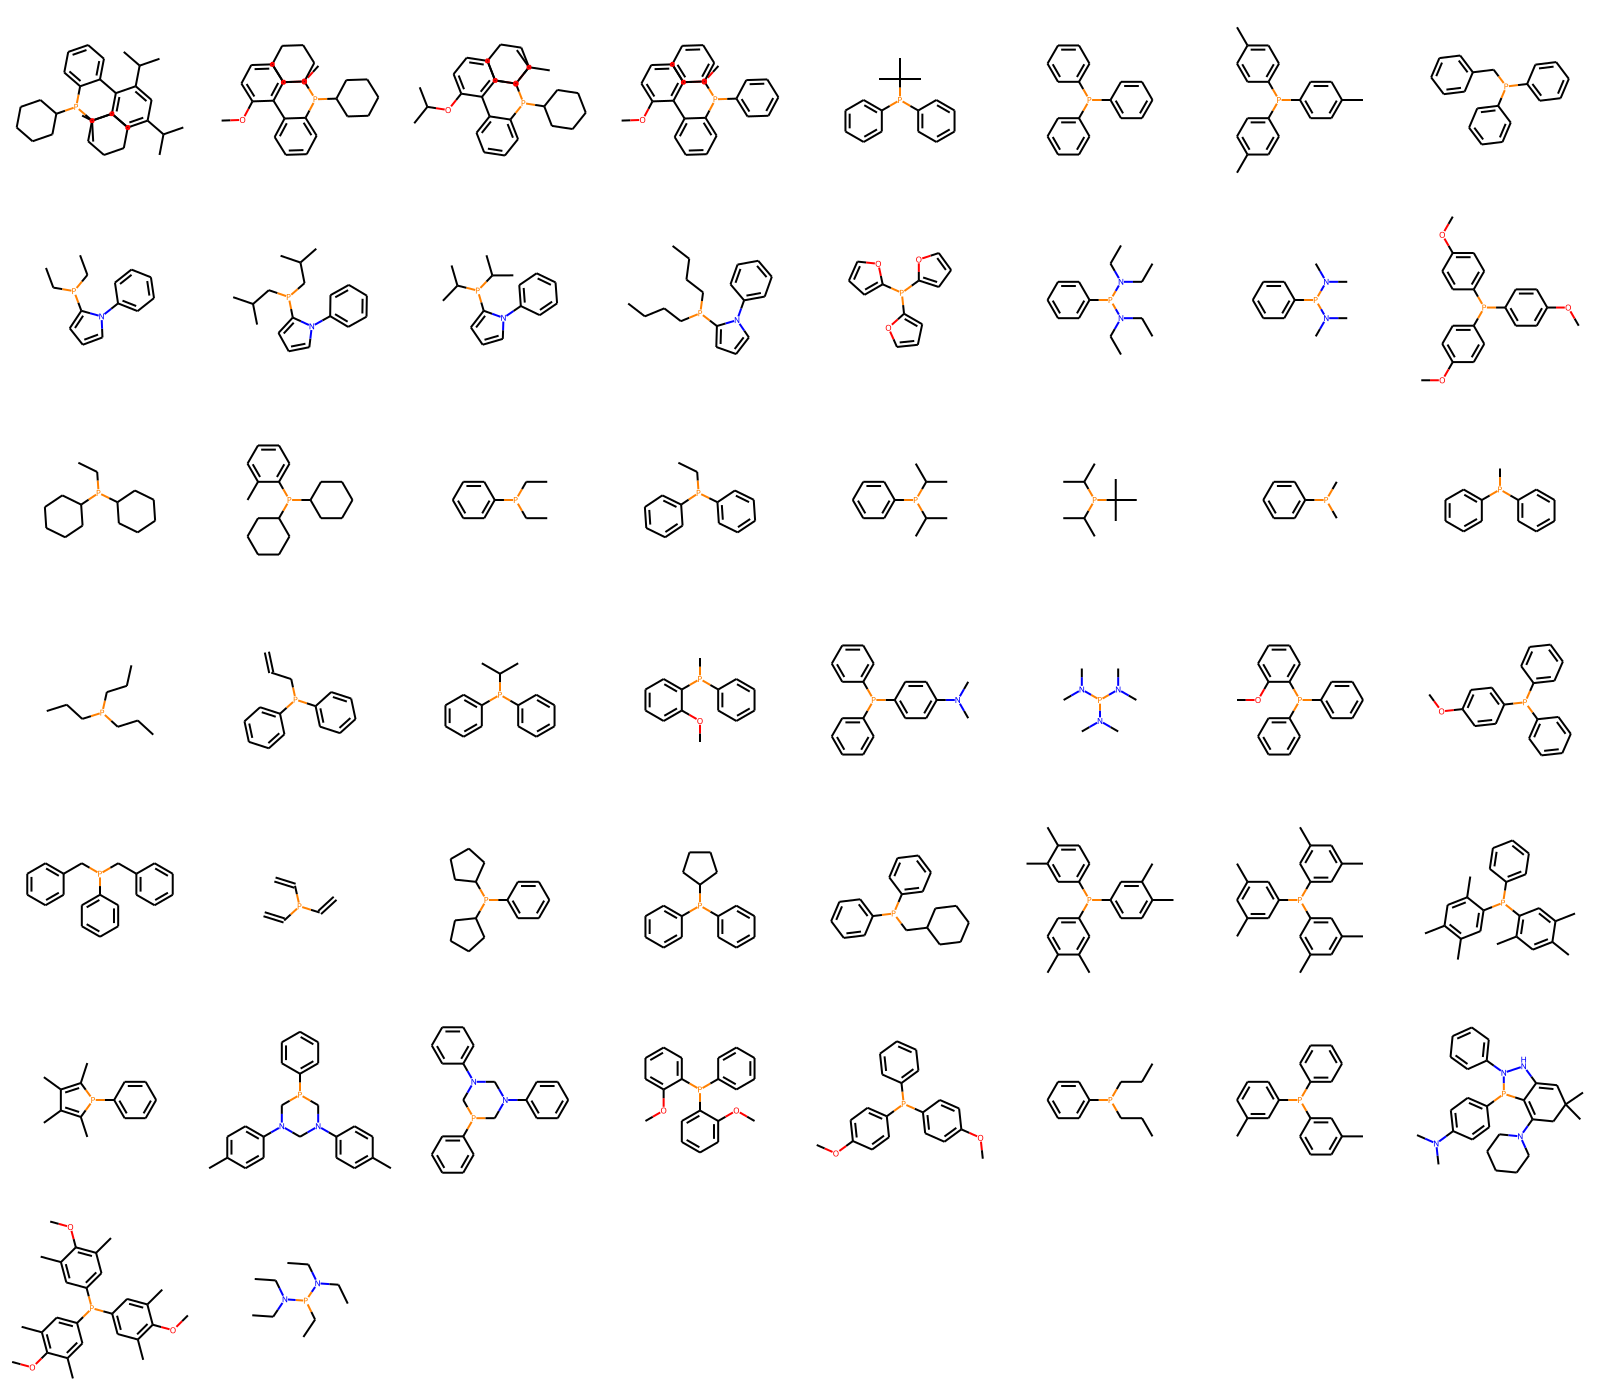

In [ ]:
mols = [Chem.MolFromSmiles(smi) for smi in df_manual_cutout['SMILES']]
Draw.MolsToGridImage(mols, molsPerRow=8, subImgSize=(200, 200))

# Select those ligands that are in between area 1 and 2 on Kraken

In [ ]:
# Select ligands with x4(LUMO Energy) in range which we hypothesis to provide yields
list_features = []
for i in df_x['x4']:
    if -0.01<i<0.03:
        list_features.append(i)
    else:
        continue
df_ligand_area1to2 = pd.DataFrame({'x4':list_features})


In [ ]:
df_dft_area1to2 = df_x.loc[df_x['x4'].isin(df_ligand_area1to2['x4'])]

In [ ]:
df_dft_area1to2.shape

(237, 198)

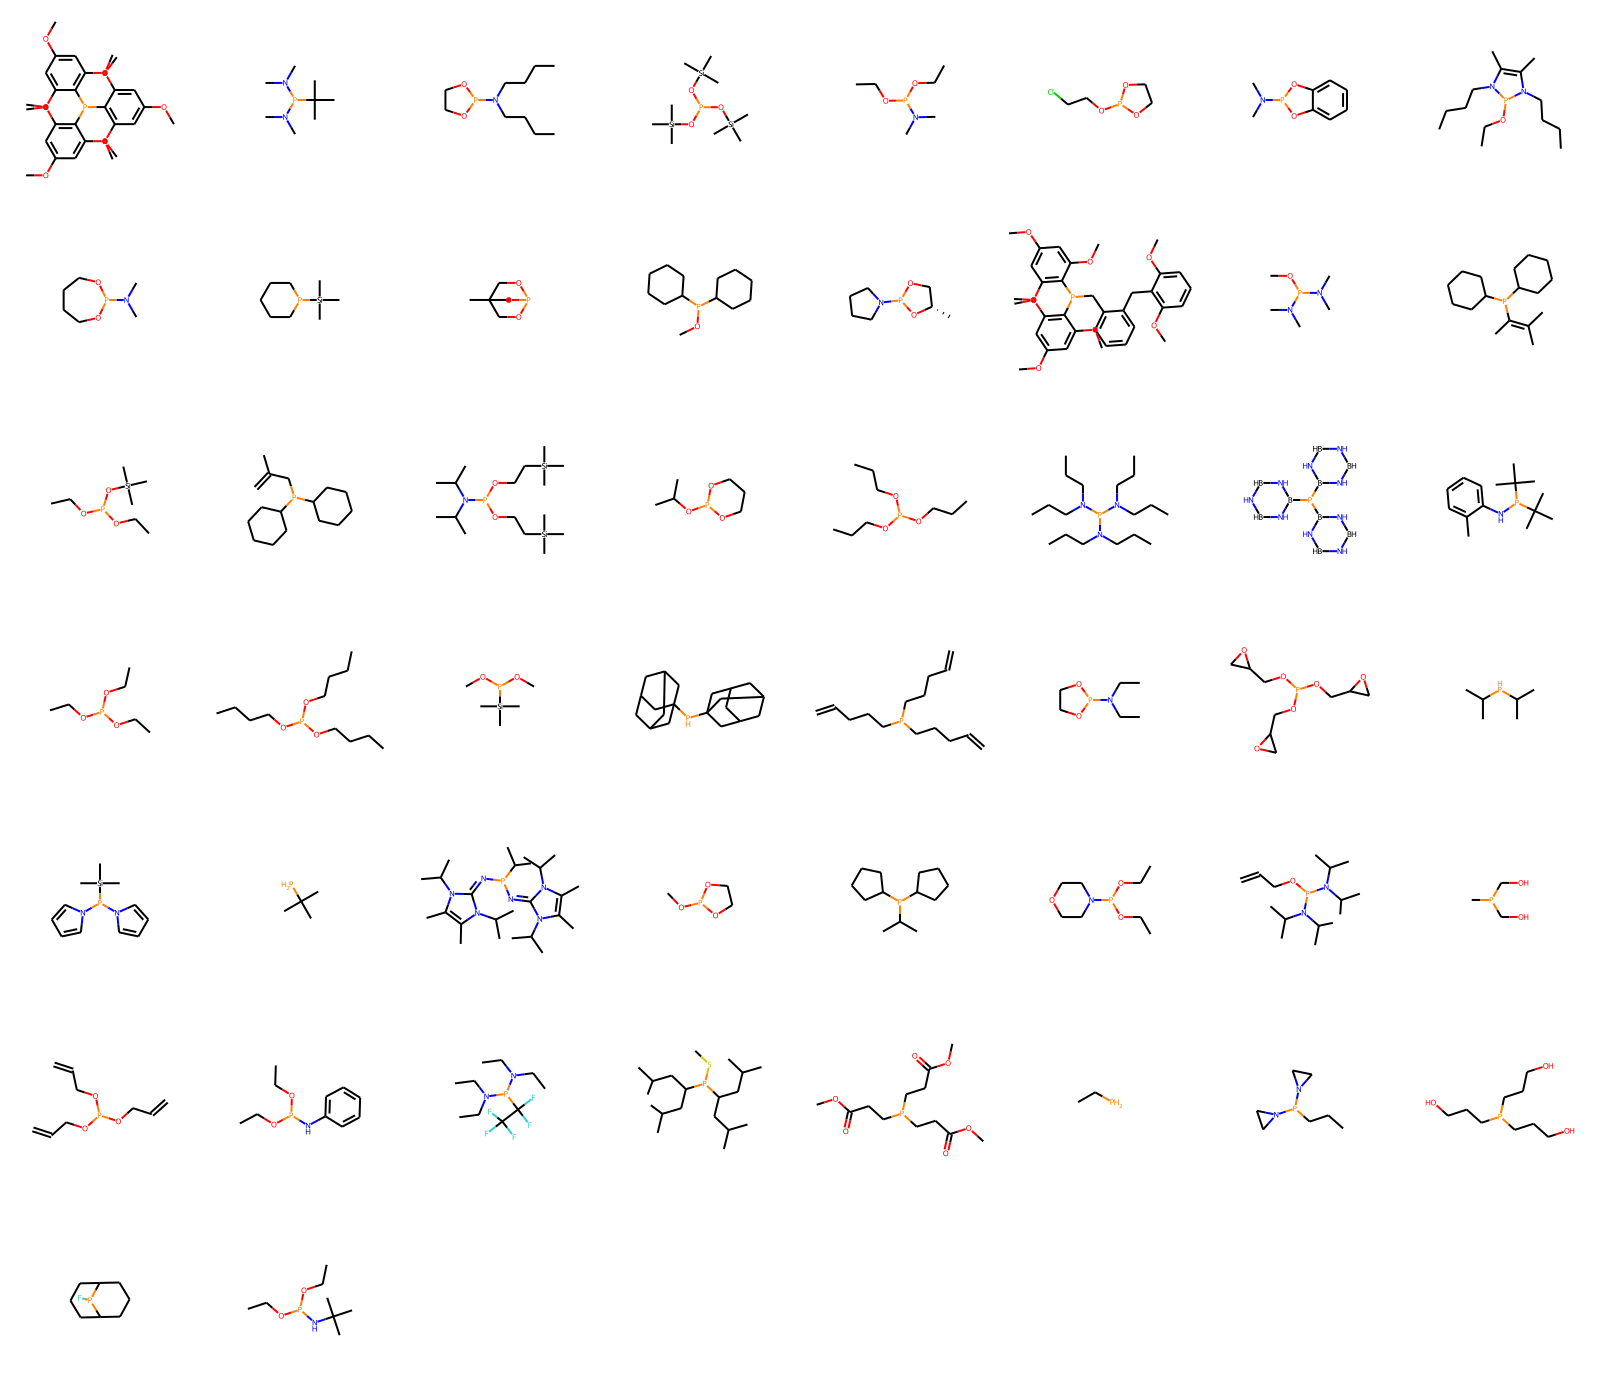

In [ ]:
mols = [Chem.MolFromSmiles(smi) for smi in df_dft_area1to2['SMILES']]
Draw.MolsToGridImage(mols, molsPerRow=8, subImgSize=(200, 200))

In [ ]:
#Maybe not needed? Commercial list don't exclude all commercially unavailable ones... but does it excludes some commercially available ones?
df_dft_area1to2_commercial = df_dft_area1to2.loc[df_dft_area1to2['ID'].isin(df_commercial)]

In [ ]:
df_dft_area1to2_commercial

,SMILES,ID,x1,x2,x3,x4,x5,x6,x7,x8,...,x184,x185,x186,x187,x188,x189,x190,x191,x192,x193
49,COc1cc(OC)c(P(c2c(OC)cc(OC)cc2OC)c2c(OC)cc(OC)...,50,-0.084458,1.839748,-0.180680,0.004548,-0.088066,0.185228,0.020945,0.082264,...,0.048312,6.184573,7.188708,7.126511,7.695819,0.569308,7.179184,23,28,2462.718028
622,CCCCN(CCCC)P1OCCO1,670,-0.042570,1.872609,-0.246034,0.018184,-0.113925,0.264219,0.024563,0.111371,...,2.679852,6.842942,6.947215,6.618681,7.458847,0.840167,6.916896,50,56,539.332667
437,C[Si](C)(C)OP(O[Si](C)(C)C)O[Si](C)(C)C,453,-0.045211,1.838430,-0.246503,0.022006,-0.112249,0.268509,0.023468,0.094636,...,0.141585,5.817087,7.790116,6.144382,7.968695,1.824314,7.580859,5,24,339.575806
623,CCOP(OCC)N(C)C,671,-0.043546,1.822596,-0.242447,0.027164,-0.107641,0.269610,0.021498,0.125190,...,0.472788,5.790724,6.578151,5.608126,6.920955,1.312829,6.877222,18,29,112.972222
635,ClCCOP1OCCO1,683,-0.024626,1.959831,-0.280654,0.003018,-0.138818,0.283672,0.034002,0.117079,...,2.483165,5.070664,6.810735,6.619204,8.085480,1.466276,6.647661,12,15,34.488667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211,CN(C)c1ccc(P(C(C)(C)C)C(C)(C)C)cc1,216,-0.070188,1.780809,-0.205680,-0.008590,-0.107135,0.197090,0.029118,0.088710,...,0.000000,6.086297,7.006888,7.006888,7.006888,0.000000,7.006888,1,1,21.922722
546,CCOP(N(C)C)N(C)C,564,-0.050457,1.815449,-0.216471,0.026637,-0.094917,0.243108,0.018538,0.120909,...,1.070221,4.808594,6.537075,6.498633,6.757757,0.259124,6.709646,9,12,51.326250
1132,COP(F)F,1292,-0.008326,2.124500,-0.323048,-0.004551,-0.163800,0.318496,0.042122,0.147552,...,0.674898,3.875368,6.476995,5.007652,6.501995,1.494343,6.501995,2,3,1.298500
567,C1CCC(OP(OC2CCCCC2)OC2CCCCC2)CC1,589,-0.041807,1.860638,-0.251071,0.023575,-0.113748,0.274645,0.023561,0.100502,...,0.696640,7.324801,7.239278,5.052395,7.618733,2.566338,7.618733,35,40,1270.289000


In [ ]:
mols = []
for smi in df_dft_area1to2['SMILES']:
    mol = Chem.MolFromSmiles(smi)
    if mol is None:
        # handing error
        print("cannot parse SMILES: {}".format(smi))
        continue

    mols.append(mol)
subms=[]
bad_structures = ['OP(O)O','CP(OC)OC','COP(C1=CC=CC=C1)OC','OP(N)O','S','F','Cl','I','Br','C=C','C=O','C#N','PO']
for i in bad_structures:
    p = Chem.MolFromSmiles(i)
    submolstruc = [x for x in mols if x.HasSubstructMatch(p)]
    subms.extend(submolstruc)
    
subms_smiles = []
for smi in subms:
    mol = Chem.MolToSmiles(smi)
    if mol is None:
        # handing error
        print("cannot parse SMILES: {}".format(smi))
        continue

    subms_smiles.append(mol)
len(subms_smiles)

212

There are double counted structures.
PH cannot be eliminates because the way smiles string cope with Hs.
Same thing for OHs.

In [ ]:
df_dft_area1to2_commercial_noPO = df_dft_area1to2_commercial.loc[~df_dft_area1to2_commercial['SMILES'].isin(subms_smiles)]

In [ ]:
df_dft_area1to2_noPO = df_dft_area1to2.loc[~df_dft_area1to2['SMILES'].isin(subms_smiles)]

In [ ]:
df_dft_area1to2_noPO.shape

(110, 198)

In [ ]:
df_dft_area1to2_commercial_noPO.shape

(37, 198)

#### During rotation presentation Abby was interested: this following photo shows ligands between area 1 and 2, which might contains those that havn't been tried because sample size for that region are too small.

c:\Users\Ran Tao\.conda\envs\edbo\lib\site-packages\rdkit\Chem\Draw\IPythonConsole.py:254: UserWarning: Truncating the list of molecules to be displayed to 50. Change the maxMols value to display more.
  % (maxMols))


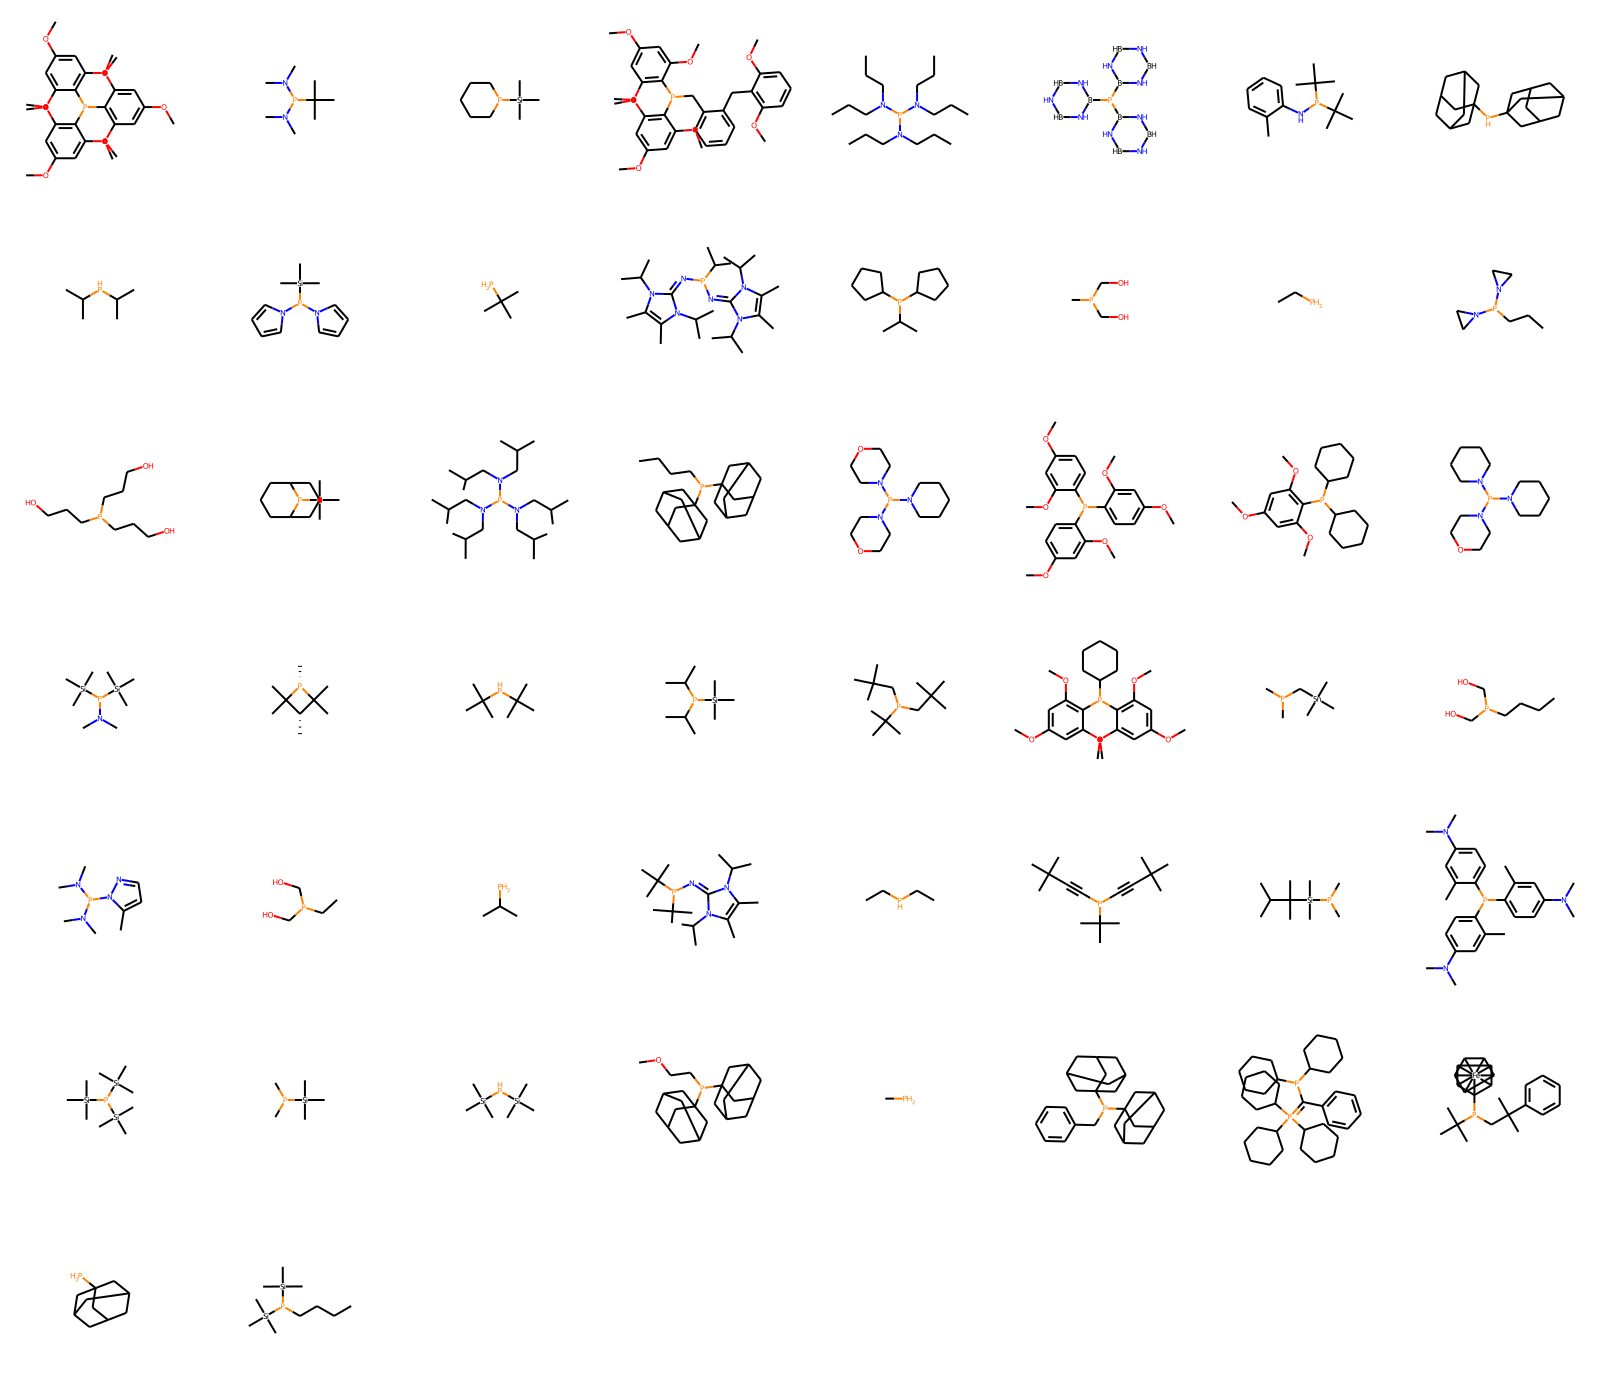

In [ ]:
mols = [Chem.MolFromSmiles(smi) for smi in df_dft_area1to2_noPO['SMILES']]
Draw.MolsToGridImage(mols, molsPerRow=8, subImgSize=(200, 200))

# Those excluded because not on commercial list

In [ ]:
mols = []
for smi in df_dft_selected3_excluede['SMILES']:
    mol = Chem.MolFromSmiles(smi)
    if mol is None:
        # handing error
        print("cannot parse SMILES: {}".format(smi))
        continue

    mols.append(mol)
subms=[]
bad_structures = ['OP(O)O','CP(OC)OC','COP(C1=CC=CC=C1)OC','OP(N)O','S','F','Cl','I','Br','C=C','C=O','C#N','PO']
for i in bad_structures:
    p = Chem.MolFromSmiles(i)
    submolstruc = [x for x in mols if x.HasSubstructMatch(p)]
    subms.extend(submolstruc)
    
subms_smiles = []
for smi in subms:
    mol = Chem.MolToSmiles(smi)
    if mol is None:
        # handing error
        print("cannot parse SMILES: {}".format(smi))
        continue

    subms_smiles.append(mol)
len(subms_smiles)


79

In [ ]:
df_dft_selected3_excluded_noPO = df_dft_selected3_excluede.loc[~df_dft_selected3_excluede['SMILES'].isin(subms_smiles)]

In [ ]:
df_dft_selected3_excluded_noPO

,SMILES,ID,x1,x2,x3,x4,x5,x6,x7,x8,...,x184,x185,x186,x187,x188,x189,x190,x191,x192,x193
1316,CC(C)OCCP(c1ccccc1)c1ccccc1,1607,-0.052090,1.843863,-0.228015,-0.027974,-0.127994,0.200040,0.040955,0.068221,...,1.224768,6.044818,7.162876,6.968586,7.361241,0.392655,7.063091,22,39,643.865528
1221,COc1c(C)cc(P(c2cc(C)c(OC)c(C)c2)c2ccccc2C)cc1C,1506,-0.052125,1.840773,-0.218796,-0.021835,-0.120316,0.196961,0.036749,0.058621,...,0.015880,7.007716,7.021562,7.013637,7.577609,0.563972,7.577609,5,12,642.742528
1409,COCCP(C)C,1702,-0.061415,1.808750,-0.233218,0.037893,-0.097663,0.271111,0.017602,0.129677,...,2.404492,4.012451,6.057924,5.776133,7.782646,2.006513,7.363086,12,17,29.385306
1301,CC(C)(C)[Si](C)(C)Oc1ccc(P(c2ccccc2)c2ccccc2)cc1,1592,-0.051042,1.842912,-0.221987,-0.026956,-0.124472,0.195031,0.039721,0.058340,...,0.357742,6.042019,6.986072,6.966571,7.014339,0.047768,7.012408,10,20,930.898861
1512,CC(C)c1ncc(P(c2cnc(C(C)C)[nH]2)c2cnc(C(C)C)[nH...,1806,-0.032892,1.902110,-0.222347,-0.013129,-0.117738,0.209218,0.033142,0.074558,...,2.051074,5.317409,6.847880,6.413336,6.984104,0.570767,6.940327,24,29,967.230028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1501,C1CN1P(N1CC1)N1CC1,1794,-0.049644,1.840563,-0.243480,0.030238,-0.106621,0.273717,0.020780,0.132966,...,0.133084,4.714976,6.506044,5.113816,6.608253,1.494437,6.488827,5,8,27.486167
1454,COc1ccc(P(c2ccc(OC)cc2)c2ccccc2OC)cc1,1747,-0.059532,1.841003,-0.211127,-0.018892,-0.115010,0.192234,0.034410,0.065542,...,0.038022,6.048726,7.032004,7.009576,7.196572,0.186996,7.196572,9,21,631.715444
1436,CCOC(OCC)P(C(C)C)C(C)C,1729,-0.057062,1.812071,-0.229423,0.033281,-0.098071,0.262704,0.018308,0.112486,...,1.098823,6.594313,7.004058,5.987921,7.557421,1.569499,7.109254,43,46,501.325861
867,C1CCC(P(C2CCCCC2)N2CCOCC2)CC1,999,-0.058697,1.799864,-0.222687,0.030234,-0.096227,0.252921,0.018306,0.105958,...,0.550482,6.101832,7.135465,6.678681,7.297889,0.619208,7.097082,25,29,690.362750


# Only Vburmin<32% and no weird chemicals

In [94]:
# Select ligands with x87(Vbur min) in range which Vbur min<32%
list_features = []
df_Vburmin = df_x['x87']/179.59
for i in df_Vburmin:
    if i<0.32:
        list_features.append(i)
    else:
        continue
df_selected = pd.DataFrame({'x87':list_features})

In [95]:
df_dft_Vburmin = df_x.loc[df_Vburmin.isin(df_selected['x87'])]

In [96]:
mols = []
for smi in df_dft_Vburmin['SMILES']:
    mol = Chem.MolFromSmiles(smi)
    if mol is None:
        # handing error
        print("cannot parse SMILES: {}".format(smi))
        continue

    mols.append(mol)
subms=[]
bad_structures = ['OP(O)O','CP(OC)OC','COP(C1=CC=CC=C1)OC','OP(N)O','S','F','Cl','I','Br','C=C','C=O','C#N','PO','C#C']
for i in bad_structures:
    p = Chem.MolFromSmiles(i)
    submolstruc = [x for x in mols if x.HasSubstructMatch(p)]
    subms.extend(submolstruc)
    
subms_smiles = []
for smi in subms:
    mol = Chem.MolToSmiles(smi)
    if mol is None:
        # handing error
        print("cannot parse SMILES: {}".format(smi))
        continue

    subms_smiles.append(mol)
len(subms_smiles)

[03:10:09] Explicit valence for atom # 7 B, 6, is greater than permitted


cannot parse SMILES: c1ccc(cc1)P([B]1234[BH]567[BH]891[BH]1%102[BH]2%114[BH]435[CH]357[BH]768[CH]691[BH]1%102[BH]%1143[BH]5761)c1ccccc1


899

In [97]:
df_dft_Vburmin_noPO = df_dft_Vburmin.loc[~df_dft_Vburmin['SMILES'].isin(subms_smiles)]

In [108]:
#Drop Buchwald ligands
df_dft_Vburmin_noPO.drop(df_dft_Vburmin_noPO[df_dft_Vburmin_noPO['buch'] == 1].index, inplace = True)

c:\Users\Ran Tao\.conda\envs\edbo\lib\site-packages\pandas\core\frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [157]:
df_dft_Vburmin_noPO_cmcl = df_dft_Vburmin_noPO.loc[df_dft_Vburmin_noPO['ID'].isin(df_commercial)]

In [159]:
df_dft_Vburmin_noPO_cmcl.to_excel('output.xlsx')

# Only Vburmin but not satisfying LUMO threshold nor between area1to2

In [135]:
# LUMO area1
list_features = []
for i in df_dft_Vburmin_noPO['x4']:
    if -0.03<i<-0.01:
        list_features.append(i)
    else:
        continue
df_ligand_LUMO_not_satisfied_not_area1to2 = pd.DataFrame({'x4':list_features})

In [143]:
# LUMO area2
list_features = []
for i in df_dft_Vburmin_noPO['x4']:
    if 0.03<i<0.04:
        list_features.append(i)
    else:
        continue
df_ligand_LUMO_not_satisfied_not_area1to2 = pd.DataFrame({'x4':list_features})

In [150]:
# LUMO area1to2
list_features = []
for i in df_dft_Vburmin_noPO['x4']:
    if -0.01<i<0.03:
        list_features.append(i)
    else:
        continue
df_ligand_LUMO_not_satisfied_not_area1to2 = pd.DataFrame({'x4':list_features})

In [99]:
# Select ligands with x4(LUMO Energy) in range of lower than -0.03 or higher than 0.04
list_features = []
for i in df_dft_Vburmin_noPO['x4']:
    if -0.03>i or i>0.04:
        list_features.append(i)
    else:
        continue
df_ligand_LUMO_not_satisfied_not_area1to2 = pd.DataFrame({'x4':list_features})


In [151]:
df_dft_Vburmin_noPO_noLUMO_not_area1to2 = df_dft_Vburmin_noPO.loc[df_dft_Vburmin_noPO['x4'].isin(df_ligand_LUMO_not_satisfied_not_area1to2['x4'])]

In [152]:
df_dft_Vburmin_noPO_noLUMO_not_area1to2.shape

(67, 199)

In [153]:
df_dft_Vburmin_noPO_noLUMO_not_area1to2_commercial = df_dft_Vburmin_noPO_noLUMO_not_area1to2.loc[df_dft_Vburmin_noPO_noLUMO_not_area1to2['ID'].isin(df_commercial)]

In [154]:
df_dft_Vburmin_noPO_noLUMO_not_area1to2_commercial.shape

(23, 199)

In [155]:
df_dft_Vburmin_noPO_noLUMO_not_area1to2_commercial.to_excel('output.xlsx')

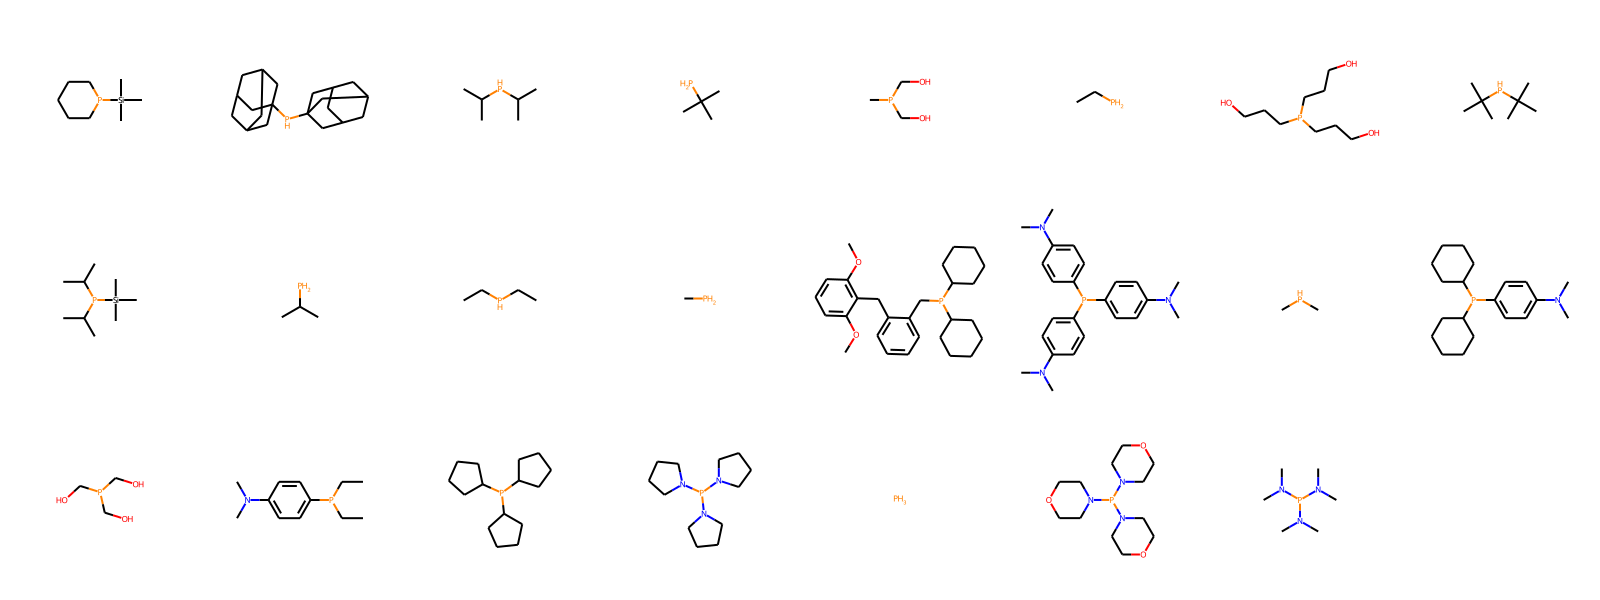

In [156]:
mols = [Chem.MolFromSmiles(smi) for smi in df_dft_Vburmin_noPO_noLUMO_not_area1to2_commercial['SMILES']]
Draw.MolsToGridImage(mols, molsPerRow=8, subImgSize=(200, 200))

# Match ID with Kraken

In [ ]:
df_pool = pd.read_excel('P_selected.xlsx', engine = 'openpyxl', sheet_name='test')

In [ ]:
df_dft_withpool = df_all.loc[df_all['ID'].isin(df_pool['ID'])]

In [ ]:
df_dft_withpool.to_excel('output.xlsx')

# SMILES to Chemdraw

In [ ]:
df_further_sam_notseen = pd.read_excel('P_selected.xlsx', sheet_name='Further_Sam_nonseen')

In [ ]:
listsmile = '.'.join(df_dft_Vburmin_noPO_noLUMO_not_area1to2_commercial['SMILES'])

In [ ]:
listsmile

'C[C@@H]1C[C@H](P(c2ccccc2)c2ccccc2)OB(c2ccccc2)O1.c1ccc(P(c2ccccc2)c2ncccn2)cc1.c1ccc(P(n2cccc2)n2cccc2)cc1.OCP(c1ccccc1)c1ccccc1.C[C@]12C[C@@]3(C)O[C@](C)(C[C@@](C)(O1)O3)P2c1ccccc1.CCP(CC)c1ccccc1-n1c2ccccc2c2ccccc21.Pc1ccc2ccccc2c1.CN(c1ccccc1)P(c1ccccc1)c1ccccc1.CC(C)(C)NP(c1ccccc1)c1ccccc1.CC(C)(C)c1ccc2c(c1)P(c1ccccc1)c1ccccc1O2.COc1ccccc1-c1c(P(c2ccccc2)c2ccccc2)c2ccccc2n1C.c1ccc(P(c2ccccn2)c2ccccn2)nc1.CCCCp1cc(C)c(C)c1.Cc1cc(C)c(-c2cc(-c3c(C)cc(C)cc3C)cc(P(c3cc(-c4c(C)cc(C)cc4C)cc(-c4c(C)cc(C)cc4C)c3)c3cc(-c4c(C)cc(C)cc4C)cc(-c4c(C)cc(C)cc4C)c3)c2)c(C)c1.CCCCP(CCCC)c1nccn1-c1ccccc1.COCc1ccccc1P(c1ccccc1)c1ccccc1.c1ccc(-p2cccc2)cc1.c1ccc2c(c1)cc(P1C3CCCC1CCC3)c1ccccc12.c1ccc(P(c2ccccc2)n2cccc2)cc1.Cc1cccc(P(c2ccccc2)c2ccccc2)n1.c1ccc(-p2c3ccccc3c3ccccc32)cc1.CN(P(OC1=CC=C(C=CC=C2)C2=[C@]13)OC4=[C@]3C(C=CC=C5)=C5C=C4)C.Cc1cccc(NP(c2ccccc2)c2ccccc2)n1.Cn1c(-c2ccccc2)c(P(C2CCCCC2)C2CCCCC2)c2ccccc21.c1ccc(-c2cc(-c3ccccc3)cc(P(c3cc(-c4ccccc4)cc(-c4ccccc4)c3)c3cc(-c4ccccc4)cc(-c4ccc

# Chemdraw back to SMILES

In [ ]:
sam_1025_selected = 'CC(C)(P(C1=CC=CC=C1)C2=CC=CC=C2)C.CCN(P(N(CC)CC)C3=CC=CC=C3)CC.CCP(C4CCCCC4)C(C)CC.CCP(C5=CC=CC=C5)CC.CP(C6=CC=CC=C6)C7=CC=CC=C7.COC8=C(P(C9=CC=CC=C9)C)C=CC=C8.CN(C%10=CC=C(P(C%11=CC=CC=C%11)C%12=CC=CC=C%12)C=C%10)C.COC%13=CC=C(P(C%14=CC=CC=C%14)C%15=CC=CC=C%15)C=C%13.CC%16=CC(P(C%17=CC(C)=CC(C)=C%17)C%18=CC(C)=CC(C)=C%18)=CC(C)=C%16.CC%19=CC=C(N%20CN(CP(C%20)C%21=CC=CC=C%21)C%22=CC=C(C)C=C%22)C=C%19.COC%23=CC=C(P(C%24=CC=C(OC)C=C%24)C%25=CC=CC=C%25)C=C%23.COC%26=C(C)C=C(P(C%27=CC(C)=C(OC)C(C)=C%27)C%28=CC(C)=C(OC)C(C)=C%28)C=C%26C.C[Si](C)(P(C%29=CC=CC=C%29)C%30=CC=CC=C%30)C.CC(C)(OC%31=CC=C(P(C%32=CC=C(OC(C)(C)C)C=C%32)C%33=CC=C(OC(C)(C)C)C=C%33)C=C%31)C.CC[C@H]%34CC[C@@H](P%34C%35=C(C%36OCCO%36)C=CC=C%35)CC.C[C@@H]%37CC[C@H](P%37C%38=C(C%39OCCO%39)C=CC=C%38)C.CN(C%40=CC=C(P(C%41=CC=C(N(C)C)C=C%41)C%42=CC=CC=C%42)C=C%40)C.CC(N%43CCN(P%43C%44=CC=CC=C%44)C(C)C)C.CCO[Si](OCC)(OCC)CCP(C%45=CC=CC=C%45)C%46=CC=CC=C%46.CCCCP(N(C(C)C)C(C)C)CCCC.CC(C)(C%47=CC=C(P(C%48=CC=C(C(C)(C)C)C=C%48)C%49=CC=C(C(C)(C)C)C=C%49)C=C%47)C.CCN(P(C%50=CC=CC=C%50)C%51=CC=CC=C%51)CC.CP(C%52CCCCC%52)C%53CCCCC%53.CCO[Si](OCC)(OCC)CCCP(C%54=CC=CC=C%54)C%55=CC=CC=C%55.C[Si](C%56=CC=CC=C%56)(P(C%57CCCCC%57)C%58CCCCC%58)C.C[Si](C)(CP(C%59=CC=CC=C%59)C%60=CC=CC=C%60)C.COCCP(C%61=CC=CC=C%61)C%62=CC=CC=C%62.COC%63=CC=C(P(C%64=CC=C(OC)C=C%64)C%65=CC=C(OC)C=C%65)C=C%63.C%66(P(C%67=CC=CC=C%67)C%68=CC=CC=C%68)=CC=CC=C%66.C%69(CP(C%70=CC=CC=C%70)C%71=CC=CC=C%71)=CC=CC=C%69.c%72(P(c%73occc%73)c%74occc%74)ccco%72.C%75(CP(C%76=CC=CC=C%76)CC%77=CC=CC=C%77)=CC=CC=C%75.C%78(P(C%79CCCC%79)C%80CCCC%80)=CC=CC=C%78.C%81(P(C%82=CC=CC=C%82)CC%83CCCCC%83)=CC=CC=C%81.C%84(OCP(COC%85=CC=CC=C%85)COC%86=CC=CC=C%86)=CC=CC=C%84.C%87(CN%88CN(CP(C%88)C%89=CC=CC=C%89)CC%90=CC=CC=C%90)=CC=CC=C%87.C%91(P%92CC%93=CC=CC%94=C%93C%95(CCC%96=C%95C(C%92)=CC=C%96)CC%94)=CC=CC=C%91.C%97%98=CC=C(P(C%99=CC(OCCO1)=C1C=C%99)C1=CC(OCCO2)=C2C=C1)C=C%97OCCO%98.n1(P(n2cccc2)n2cccc2)cccc1.C1(CCP(C2CCCCC2)C2CCCCC2)=CC=CC=C1'

In [ ]:
sam_1025_maybe = 'Cc1c(C)p(c2ccccc2)c(C)c1C.Cn3c(P(C4=CC=CC=C4)C5=CC=CC=C5)ccc3.C[C@H]6CC[C@@H](P6c7ccccc7)C.CN8CC(C)(CN(P8C9=CC=CC=C9)C)C.CN%10CCCN(P%10C%11=CC=CC=C%11)C.CP(C(C)(C)C)C.CN%12CCN(CC%12)P(N%13CCN(CC%13)C)N%14CCN(CC%14)C.COC%15=CC(P(C%16=CC(OC)=CC=C%16)C%17=CC=CC=C%17)=CC=C%15.CN%18CC%19(CN(P%18N(C%19)C)C)C.CN(C%20=CC=NC(P(C%21=CC=CC=C%21)C%22=CC=CC=C%22)=C%20)C.C%23(N%24CN(CP(C%24)C%25=CC=CC=C%25)C%26=CC=CC=C%26)=CC=CC=C%23.c%27(P(c%28cocc%28)c%29cocc%29)cocc%27.C%30(P%31CCCC%31)=CC=CC=C%30.C%32(P%33CCCCC%33)=CC=CC=C%32.N%34(P(N%35CCCCC%35)N%36CCCCC%36)CCCCC%34.C%37(P%38CCCCCC%38)=CC=CC=C%37'

In [ ]:
sam_1025_no_beccause_small_redundant = 'CC1=CC=C(P(C2=CC=C(C)C=C2)C3=CC=C(C)C=C3)C=C1.CN(P(N(C)C)C4=CC=CC=C4)C.CC5=C(P(C6CCCCC6)C7CCCCC7)C=CC=C5.CCP(C8=CC=CC=C8)C9=CC=CC=C9.CC(P(C(C)C)C%10=CC=CC=C%10)C.CC(P(C(C)(C)C)C(C)C)C.CP(C%11=CC=CC=C%11)C.CCCP(CCC)CCC.CC(P(C%12=CC=CC=C%12)C%13=CC=CC=C%13)C.COC%14=C(P(C%15=CC=CC=C%15)C%16=CC=CC=C%16)C=CC=C%14.CC%17=C(C)C=C(P(C%18=CC(C)=C(C)C=C%18)C%19=CC(C)=C(C)C=C%19)C=C%17.CC%20=C(C)C=C(P(C%21=C(C)C=C(C)C(C)=C%21)C%22=CC=CC=C%22)C(C)=C%20.COC%23=C(P(C%24=C(OC)C=CC=C%24)C%25=CC=CC=C%25)C=CC=C%23.CCCP(C%26=CC=CC=C%26)CCC.CC%27=CC(P(C%28=CC(C)=CC=C%28)C%29=CC=CC=C%29)=CC=C%27.CCN(P(N(CC)CC)CC)CC.CN%30CCN(P%30C%31=CC=CC=C%31)C.CCCCP(N(CC)CC)CCCC.CC(C%32=CC=C(P(C%33CCCCC%33)C%34CCCCC%34)C=C%32)C.CP(C%35CCCCC%35)C.CCCCCP(C%36=CC=CC=C%36)CCCCC.CCCCP(C%37=CC=CC=C%37)C%38=CC=CC=C%38.CCCP(C%39=CC=CC=C%39)C%40=CC=CC=C%40.CCCCCCP(CCCCCC)CCCCCC.CCCCCP(N(CC)CC)CCCCC.CCCCP%41CCCC%41.CP(CC%42=CC=CC=C%42)C.CCCCCP(CCCCC)CCCCC.CCCCP(CCCC)C.CCCCP(CC%43=CC=CC=C%43)CCCC.CC(C%44=CC=C(P(C%45=CC=C(C(C)C)C=C%45)C%46=CC=C(C(C)C)C=C%46)C=C%44)C.CCC%47=CC=C(P(C%48=CC=C(CC)C=C%48)C%49=CC=C(CC)C=C%49)C=C%47.CCCCCP(C%50=CC=CC=C%50)C%51=CC=CC=C%51.CCCCCCP(C(/C=C)=C/C)C%52=CC=CC=C%52.CCCCCCP(C%53=CC=CC=C%53)CCCCCC.CN(P(N(C)C)C)C.C[Si](C)(P([Si](C)(C)C)C%54=CC=CC=C%54)C.CC%55=CC(P(C)C)=CC=C%55.CC%56=CC=C(P(C)C)C=C%56.CCP(C)C.CCCP(C)C.CCP(CC)C.CC(P(C(C)C)C)C.CC%57=CC=C(P(C%58=C(C)C=CC=C%58)C%59=CC=C(C)C=C%59)C=C%57.C%60(P(C%61CCCC%61)C%62=CC=CC=C%62)=CC=CC=C%60.C%63(P(c%64occc%64)c%65occc%65)=CC=CC=C%63.C%66(P%67CC%67)=CC=CC=C%66.C%68(P%69CCC%69)=CC=CC=C%68.C%70(P(N%71CCCCC%71)N%72CCCCC%72)=CC=CC=C%70.C%73(P(N%74CCCCC%74)C%75=CC=CC=C%75)=CC=CC=C%73.C%76([Si]%77%78CCP(CC%78)CC%77)=CC=CC=C%76'

In [ ]:
sam_1027_selected = 'COCP(C1=CC=CC=C1)COC.COC2=C(P(C3CCCCC3)C4CCCCC4)C=CC=C2.COC5=CC=C(P(C67C8C9C%10C6[Fe]9%1087%11%12%13%14C%15C%11C%12C%13C%15%14)C(C)(C)C)C=C5.CP(C%16=CC(C(C)(C)C)=CC(C(C)(C)C)=C%16)C%17=CC(C(C)(C)C)=CC(C(C)(C)C)=C%17.CC(C%18=CC(P(C%19CCCC%19)C%20=CC(C(C)C)=CC(C(C)C)=C%20)=CC(C(C)C)=C%18)C.CC(C%21=C(P(CCC%22=CC=CC=C%22)CCC%23=CC=CC=C%23)C(C(C)C)=CC=C%21)C.COCCP(C%24CCCCC%24)C%25CCCCC%25.COC%26=CC=C(P(C%27CCCCC%27)C%28CCCCC%28)C=C%26.COC%29=CC=C(CP(C%30=CC=CC=C%30)C%31=CC=CC=C%31)C=C%29.COC%32=CC=C(CP(C%33=CC=CC=C%33)CC%34=CC=C(OC)C=C%34)C=C%32.C%35(P(CC%36CCCC%36)CC%37CCCC%37)=CC=CC=C%35.C%38(P(C%39=CC=CC=C%39)CC%40CCCC%40)=CC=CC=C%38.C%41(P(CC%42CCCCC%42)CC%43CCCCC%43)=CC=CC=C%41'

In [ ]:
sam_1027_selected_area1to2 = 'CC(CN(P(N(CC(C)C)CC(C)C)N(CC(C)C)CC(C)C)CC(C)C)C.COC1=C(CC2=C(CP(C3CCCCC3)C4CCCCC4)C=CC=C2)C(OC)=CC=C1.CCCCn5c(P(C6CCCCC6)C7CCCCC7)ccc5.CN(C8=CC=C(P(C9=CC=C(N(C)C)C=C9)C%10=CC=C(N(C)C)C=C%10)C=C8)C.CN(C%11=CC=C(P(C%12CCCCC%12)C%13CCCCC%13)C=C%11)C.CC(C)(P(C(C)(C)C)CCC%14=CC=CC=C%14)C.C%15(P(C%16CCCC%16)C%17=CC(CCCN%18CCC%19)=C%18C%19=C%17)=CC%20=C%21C(CCCN%21CCC%20)=C%15.N%22(P(N%23CCCC%23)N%24CCCC%24)CCCC%22.N%25(P(N%26CCOCC%26)N%27CCOCC%27)CCOCC%25'

In [ ]:
sam_NoLUMO_1103 = "CN(P(C1=CC=CC=C1)C2=CC=CC=C2)C3=CC=CC=C3.COCC4=C(P(C5=CC=CC=C5)C6=CC=CC=C6)C=CC=C4.CN(C)P(OC7=CC=C8C(C=CC=C8)=C79)OC%10=C9C%11=CC=CC=C%11C=C%10.CC(C%12%13C%14C%15C%16C%12[Fe]%15%16%14%13%17%18%19%20C%21C%17C%18C%19C%21%20)P(C%22=CC=CC=C%22)C%23=CC=CC=C%23.CC([C@@H]%24CC[C@H](C[C@@H]%24P(C%25=CC=CC=C%25)C%26=CC=CC=C%26)C)C.CC(C)(P%27C%28=C(C%29=CC=CC=C%29%27)C=CC=C%28)C.CC(C)(C)C%30=CC(C(C)(C)C)=CC(P(C%31%32C%33C%34C%35C%31[Fe]%34%35%33%32%36%37%38%39C%40C%36C%37C%38C%40%39)C%41=CC(C(C)(C)C)=CC(C(C)(C)C)=C%41)=C%30.C%42(CCP(C%43=CC=CC=C%43)C%44=CC=CC=C%44)=CC=CC=C%42.C%45(P(C%46%47C%48C%49C%50C%46[Fe]%49%50%48%47%51%52%53%54C%55C%51C%52C%53C%55%54)C%56=CC=CC=C%56)=CC=CC=C%45"

In [ ]:
def change_Chemdraw_to_Smiles_match_Kraken_dataset(txt, df_all):
    list_of_ligands= txt.split('.')
    print('Lenth of the list:',len(list_of_ligands))
    mols = []
    for smi in list_of_ligands:
        mol = Chem.MolFromSmiles(smi)
        if mol is None:
            # handing error
            print("cannot parse SMILES: {}".format(smi))
            continue

        mols.append(mol)
    smiles = []
    for smi in mols:
        mol = Chem.MolToSmiles(smi)
        if mol is None:
            # handing error
            print("cannot parse SMILES: {}".format(smi))
            continue

        smiles.append(mol)
    len(smiles)
    df_dft = df_all.loc[df_all['SMILES'].isin(smiles)]
    print("Shape of dataframe:",df_dft.shape)
    return df_dft
    

In [ ]:
df_dft_sam_1025_priority = change_Chemdraw_to_Smiles_match_Kraken_dataset(sam_1025_selected,df_all)

Lenth of the list: 40
Shape of dataframe: (39, 198)


In [ ]:
df_dft_sam_1025_maybe = change_Chemdraw_to_Smiles_match_Kraken_dataset(sam_1025_maybe,df_all)

Lenth of the list: 16
Shape of dataframe: (16, 198)


In [ ]:
df_dft_sam_1025_probably_not = change_Chemdraw_to_Smiles_match_Kraken_dataset(sam_1025_no_beccause_small_redundant,df_all)

Lenth of the list: 51
Shape of dataframe: (50, 198)


In [ ]:
df_dft_sam_1027_selected = change_Chemdraw_to_Smiles_match_Kraken_dataset(sam_1027_selected,df_all)

Lenth of the list: 13
Shape of dataframe: (13, 198)


In [ ]:
df_dft_sam_1027_selected_area1to2 = change_Chemdraw_to_Smiles_match_Kraken_dataset(sam_1027_selected_area1to2,df_all)

Lenth of the list: 9
Shape of dataframe: (9, 198)


In [ ]:

df_dft_sam_NoLUMO_1103 = change_Chemdraw_to_Smiles_match_Kraken_dataset(sam_NoLUMO_1103,df_all)

Lenth of the list: 9
Shape of dataframe: (7, 199)


In [ ]:
df_dft_sam_1025_priority['Priority'] = 0
df_dft_sam_1025_maybe['Priority'] = 1
df_dft_sam_1025_probably_not['Priority'] = 2

c:\Users\Ran Tao\.conda\envs\edbo\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
c:\Users\Ran Tao\.conda\envs\edbo\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\Users\Ran Tao\.conda\envs\edbo\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

In [ ]:
frame = [df_dft_sam_1025_priority,df_dft_sam_1025_maybe,df_dft_sam_1025_probably_not]
df_dft_1025_sam = pd.concat(frame)

In [ ]:
df_dft_sam_NoLUMO_1103.to_excel('output.xlsx')

In [ ]:
#dataset with commercial list phosphine ligand on LUMO and Vburmin, with set of rules from sam applied to them
df_commercial_rules = pd.read_excel('P_selected.xlsx', sheet_name='Commercial_rules_')

In [ ]:
df_commercial_rules_except = df_commercial_rules.loc[~df_commercial_rules['ID'].isin(df_dft_1025_sam['ID'])]

In [ ]:
#Weird ligands
df_commercial_rules_except.shape

(25, 203)